# <p style="background-color:blue; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Digital Marketing Campaign Conversion</p>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Satish Patil\OneDrive\Desktop\BIA\Capstone Project\digital_marketing_campaign_dataset.csv")

In [3]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [4]:
df.sample(5)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
4614,12614,37,Male,148574,PPC,Awareness,5527.842774,0.199417,0.142935,22,4.506446,14.848504,64,4,5,2,4276,IsConfid,ToolConfid,1
844,8844,63,Male,82624,Referral,Retention,7916.550956,0.286835,0.128817,0,3.147788,13.527703,36,18,0,0,682,IsConfid,ToolConfid,1
2555,10555,42,Female,43238,SEO,Consideration,6519.574741,0.203345,0.034002,46,8.111914,5.390683,77,0,6,9,2773,IsConfid,ToolConfid,1
6881,14881,58,Male,112154,Social Media,Awareness,1816.239637,0.118347,0.067813,34,9.427912,13.160618,76,15,0,2,1929,IsConfid,ToolConfid,1
7240,15240,38,Female,132172,PPC,Conversion,8790.053284,0.164722,0.182761,40,1.809656,14.931933,29,5,5,3,445,IsConfid,ToolConfid,1


In [5]:
df.shape

(8000, 20)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [10]:
df.drop(columns=["AdvertisingPlatform","AdvertisingTool","CustomerID"], axis =1, inplace= True)

# Categorical Features Encoding

In [11]:
le = LabelEncoder()
col = ["Gender", "CampaignChannel","CampaignType"]
for i in col:
    df[i] = le.fit_transform(df[i])

In [12]:
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


# Exploratory Data Analysis (EDA) and Visualization

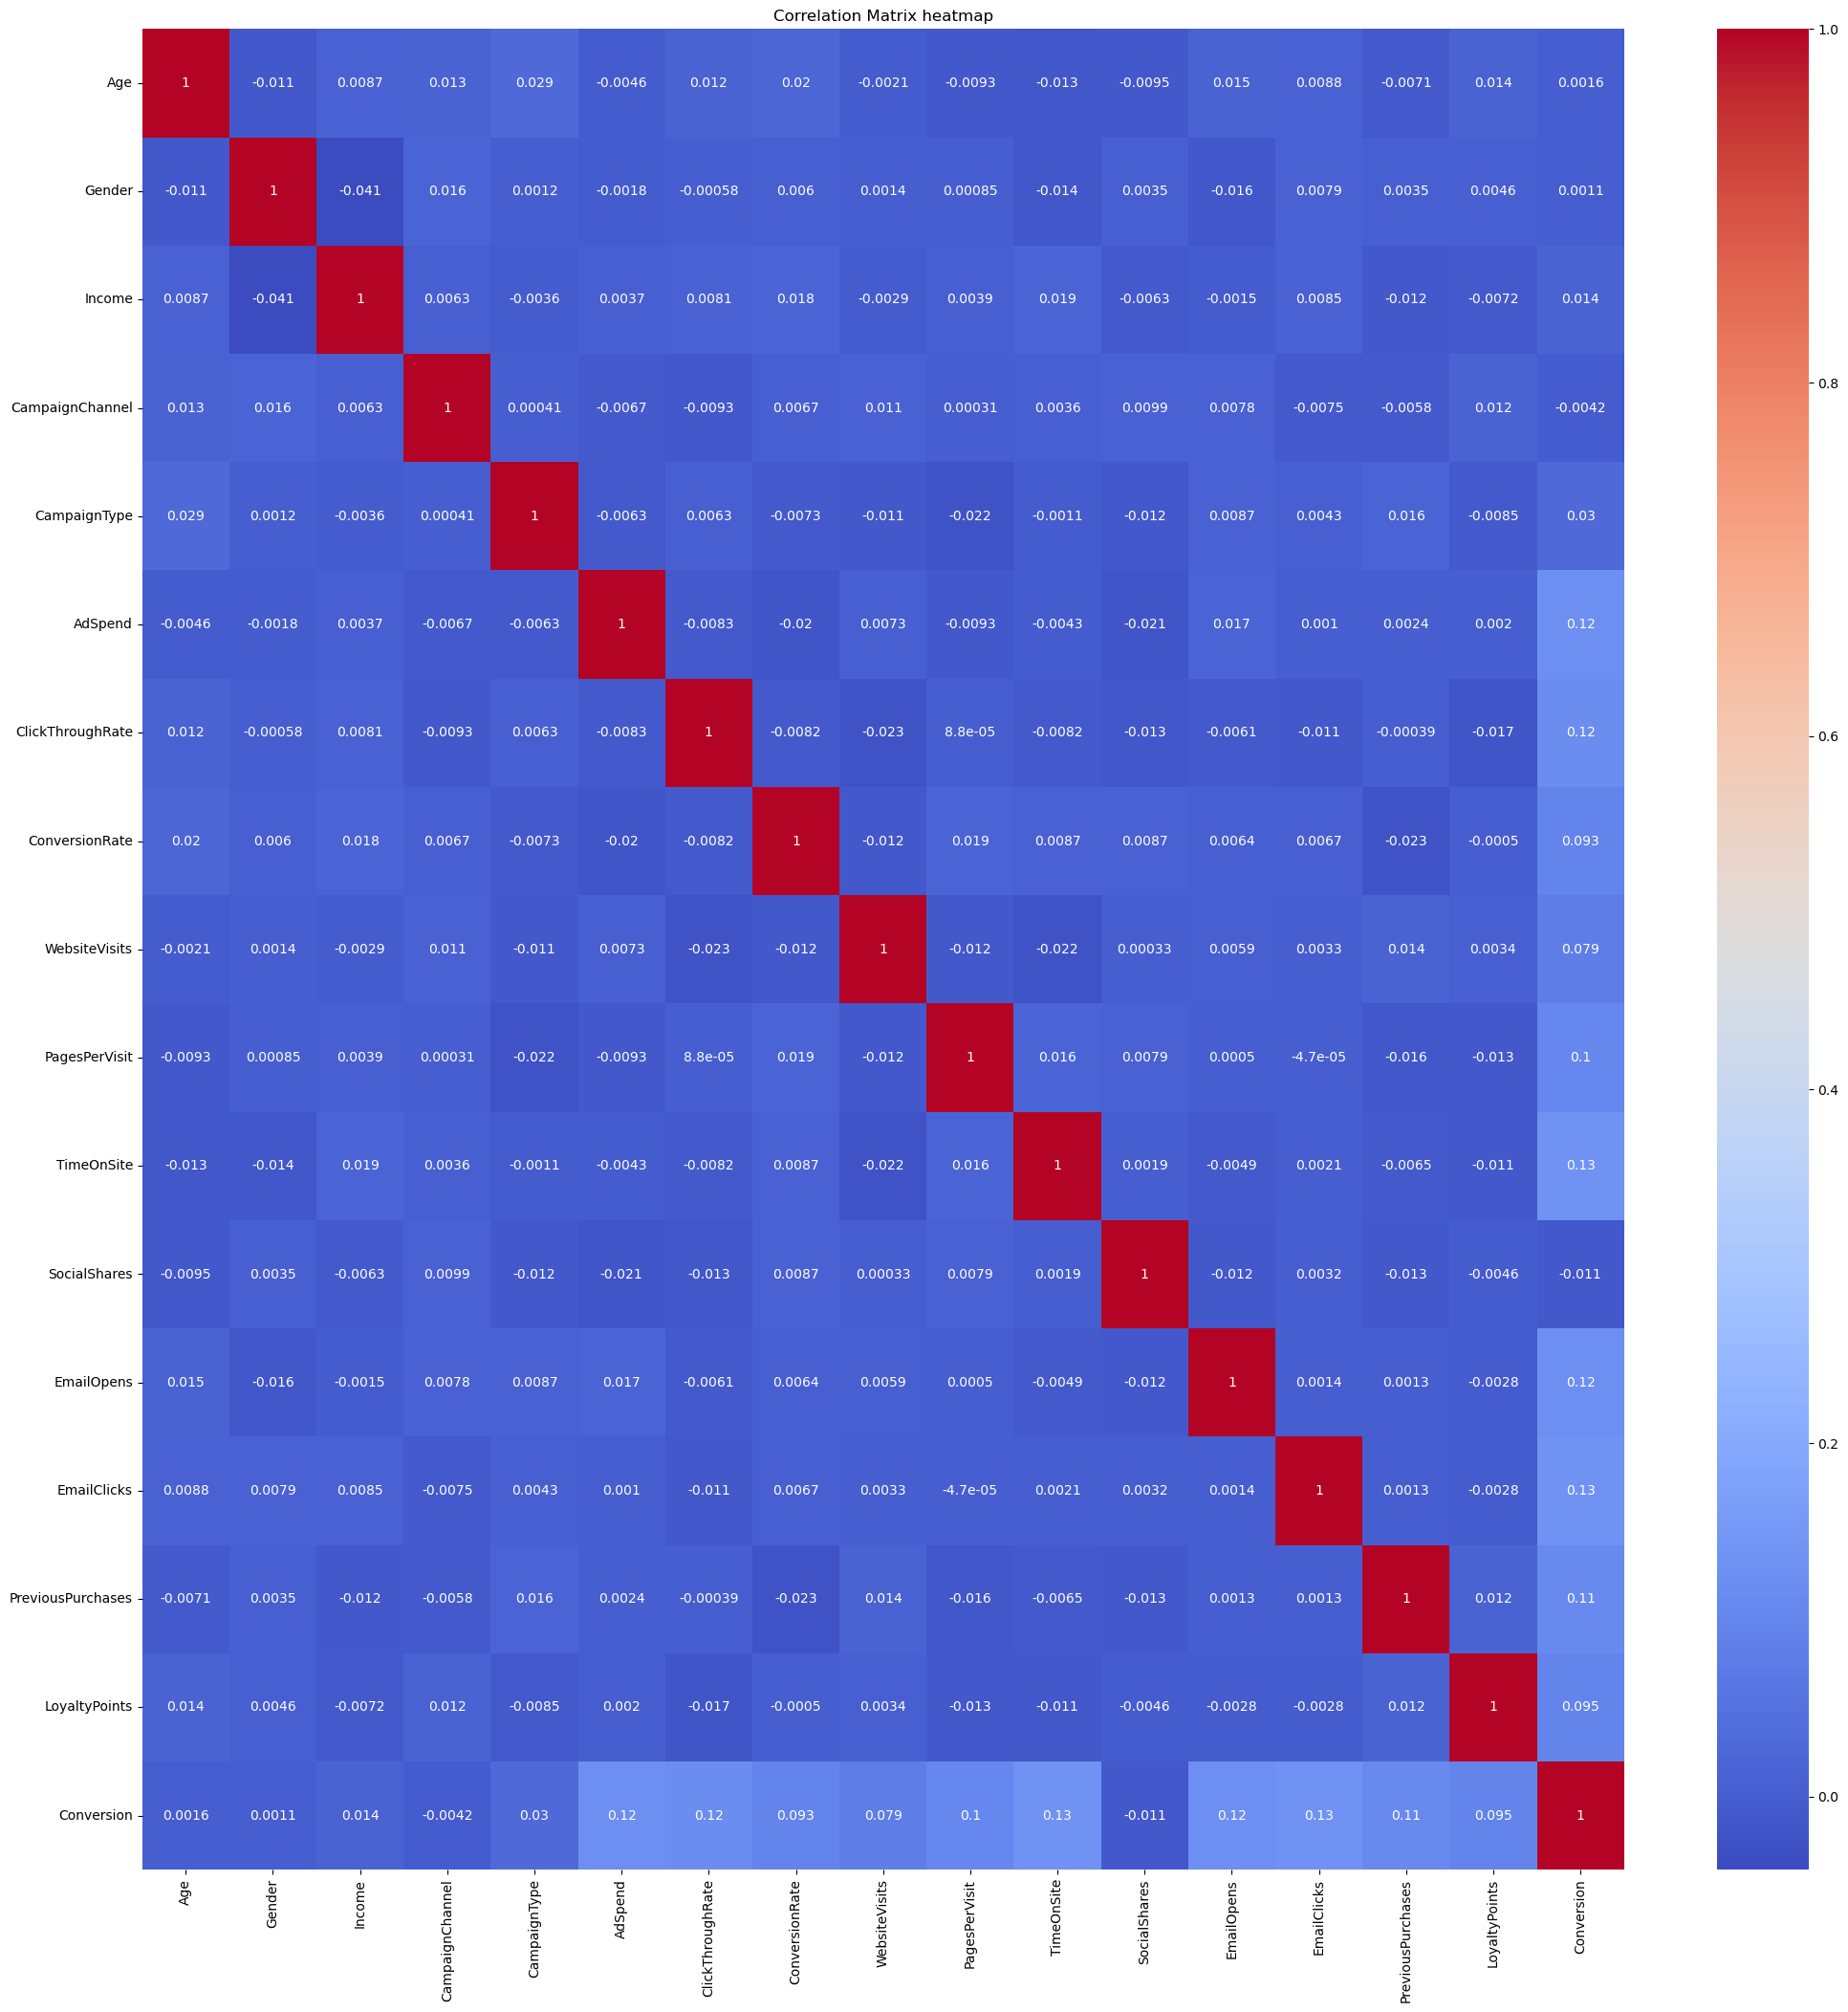

In [13]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix heatmap')
plt.show()

In [14]:
unique_values = df.nunique()
print("Unique values for each column:")
print(unique_values)

Unique values for each column:
Age                    52
Gender                  2
Income               7789
CampaignChannel         5
CampaignType            4
AdSpend              8000
ClickThroughRate     8000
ConversionRate       8000
WebsiteVisits          50
PagesPerVisit        8000
TimeOnSite           8000
SocialShares          100
EmailOpens             20
EmailClicks            10
PreviousPurchases      10
LoyaltyPoints        3983
Conversion              2
dtype: int64


Text(0.5, 0, '0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media\n\nCampaignChannel')

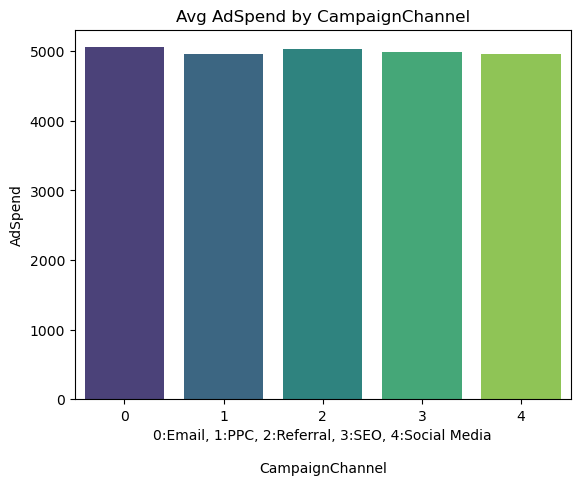

In [15]:
sns.barplot(x="CampaignChannel", y="AdSpend", data=df, ci=None,palette='viridis')
plt.title('Avg AdSpend by CampaignChannel', fontsize=12)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media\n\nCampaignChannel", fontsize=10)

Text(0.5, 0, '0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignType')

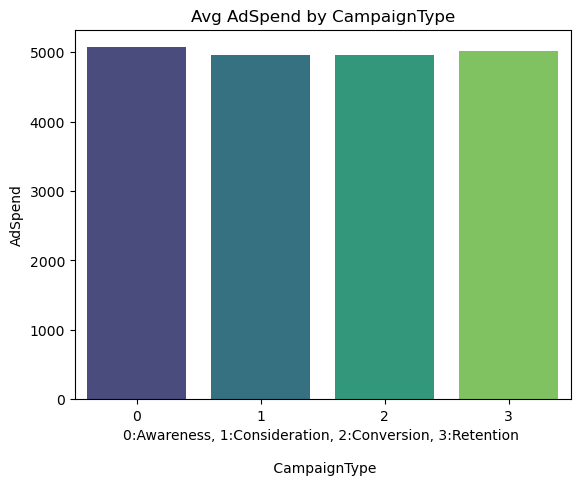

In [16]:
sns.barplot(x="CampaignType", y="AdSpend", data=df, ci=None, palette='viridis')
plt.title('Avg AdSpend by CampaignType', fontsize=12)
plt.xlabel("0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignType", fontsize=10)

Text(0.5, 0, '0:Female, 1:Male \n\n Gender')

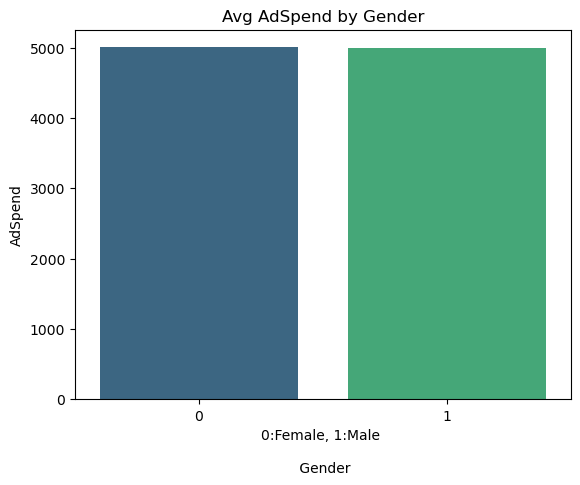

In [17]:
sns.barplot(x="Gender", y="AdSpend", data=df, ci=None,palette='viridis')
plt.title('Avg AdSpend by Gender', fontsize=12)
plt.xlabel("0:Female, 1:Male \n\n Gender", fontsize=10)

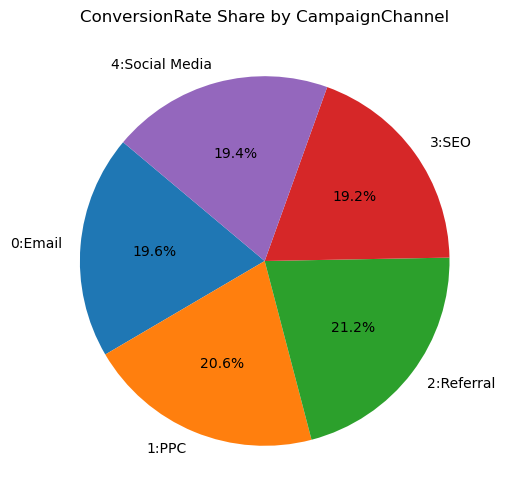

In [18]:
conversion_by_channel = df.groupby('CampaignChannel')['ConversionRate'].sum()
label = ['0:Email', '1:PPC', '2:Referral', '3:SEO', '4:Social Media']
plt.figure(figsize=(8, 6))
plt.pie(conversion_by_channel, labels=label, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title("ConversionRate Share by CampaignChannel", fontsize=12)
plt.show()

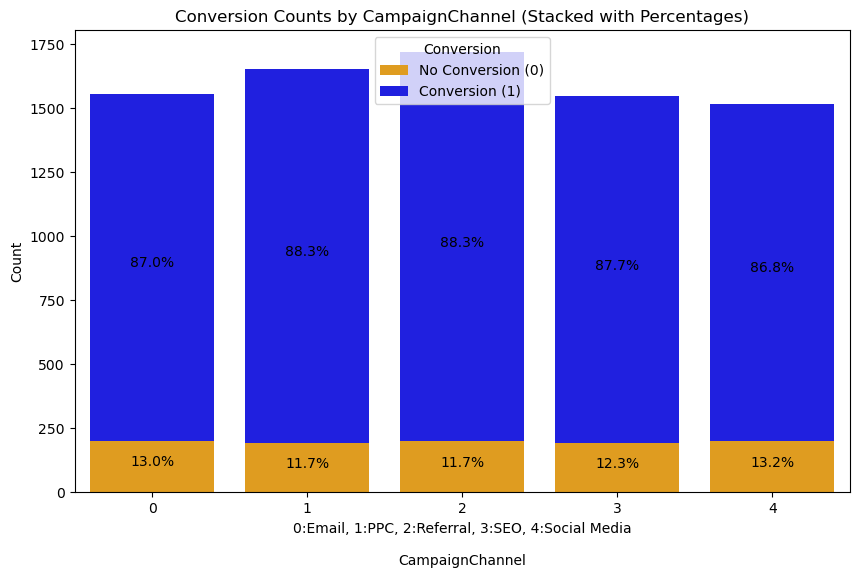

In [19]:
stacked_data = df.groupby(['CampaignChannel', 'Conversion']).size().reset_index(name='Count')
pivot_data = stacked_data.pivot(index='CampaignChannel', columns='Conversion', values='Count').fillna(0)
pivot_data['Total'] = pivot_data[0] + pivot_data[1]
pivot_data['Percent_0'] = (pivot_data[0] / pivot_data['Total']) * 100
pivot_data['Percent_1'] = (pivot_data[1] / pivot_data['Total']) * 100
plt.figure(figsize=(10, 6))
bars_0 = sns.barplot(x=pivot_data.index, y=pivot_data[0], color='orange', label='No Conversion (0)')
bars_1 = sns.barplot(x=pivot_data.index, y=pivot_data[1], bottom=pivot_data[0], color='blue', label='Conversion (1)')
for i, value in enumerate(pivot_data.index):
    plt.text(i, pivot_data[0][i] / 2, f"{pivot_data['Percent_0'][i]:.1f}%", ha='center', color='black')
    plt.text(i, pivot_data[0][i] + (pivot_data[1][i] / 2), f"{pivot_data['Percent_1'][i]:.1f}%", ha='center', color='black')
plt.title("Conversion Counts by CampaignChannel (Stacked with Percentages)", fontsize=12)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media\n\nCampaignChannel", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Conversion")
plt.show()

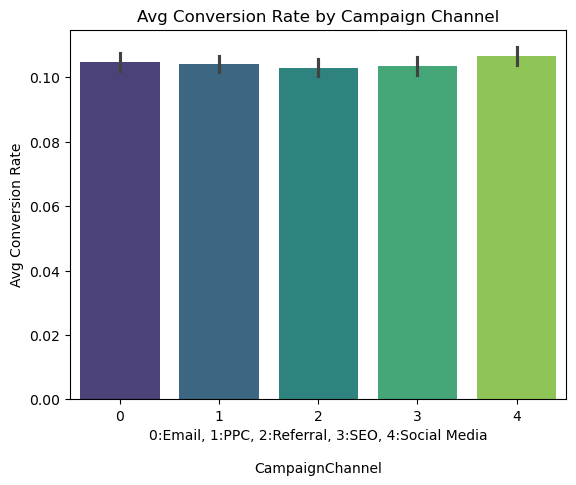

In [20]:
sns.barplot(x='CampaignChannel', y='ConversionRate', data=df,palette='viridis')
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media\n\nCampaignChannel")
plt.ylabel("Avg Conversion Rate")
plt.title("Avg Conversion Rate by Campaign Channel")
plt.show()

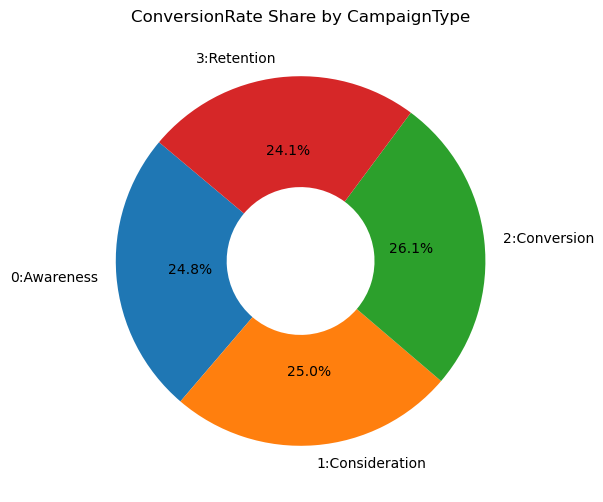

In [21]:
conversion_by_type = df.groupby('CampaignType')['ConversionRate'].sum()
label=['0:Awareness', '1:Consideration', '2:Conversion', '3:Retention']
plt.figure(figsize=(8, 6))
plt.pie(conversion_by_type, labels=label, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors, wedgeprops=dict(width=0.6))
plt.title("ConversionRate Share by CampaignType", fontsize=12)
plt.show()

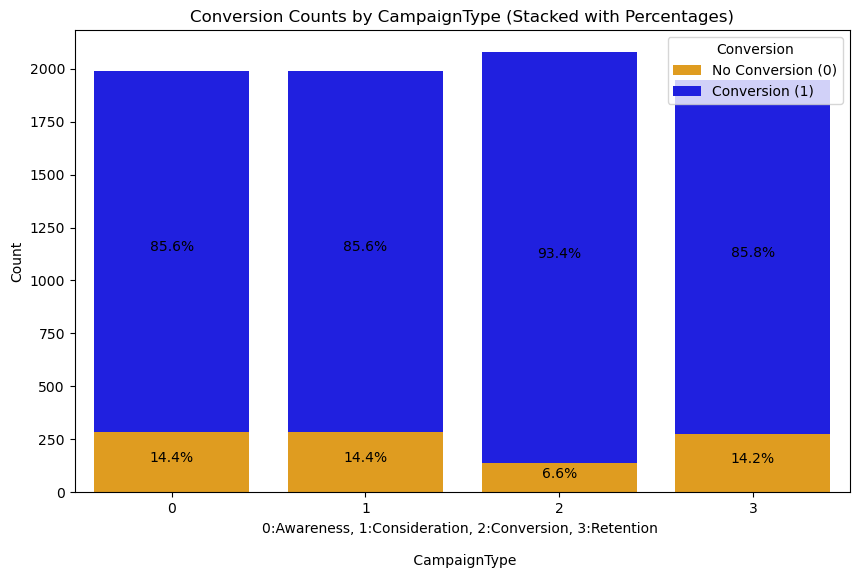

In [22]:
stacked_data = df.groupby(['CampaignType', 'Conversion']).size().reset_index(name='Count')
pivot_data = stacked_data.pivot(index='CampaignType', columns='Conversion', values='Count').fillna(0)
pivot_data['Total'] = pivot_data[0] + pivot_data[1]
pivot_data['Percent_0'] = (pivot_data[0] / pivot_data['Total']) * 100
pivot_data['Percent_1'] = (pivot_data[1] / pivot_data['Total']) * 100
plt.figure(figsize=(10, 6))
bars_0 = sns.barplot(x=pivot_data.index, y=pivot_data[0], color='orange', label='No Conversion (0)')
bars_1 = sns.barplot(x=pivot_data.index, y=pivot_data[1], bottom=pivot_data[0], color='blue', label='Conversion (1)')
for i, value in enumerate(pivot_data.index):
    plt.text(i, pivot_data[0][i] / 2, f"{pivot_data['Percent_0'][i]:.1f}%", ha='center', color='black')
    plt.text(i, pivot_data[0][i] + (pivot_data[1][i] / 2), f"{pivot_data['Percent_1'][i]:.1f}%", ha='center', color='black')
plt.title("Conversion Counts by CampaignType (Stacked with Percentages)", fontsize=12)
plt.xlabel("0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignType", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Conversion")
plt.show()

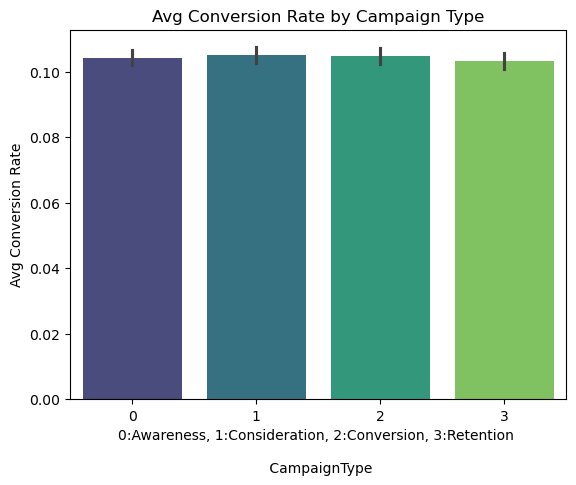

In [23]:
sns.barplot(x='CampaignType', y='ConversionRate', data=df,palette='viridis')
plt.xlabel("0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignType")
plt.ylabel("Avg Conversion Rate")
plt.title("Avg Conversion Rate by Campaign Type")
plt.show()

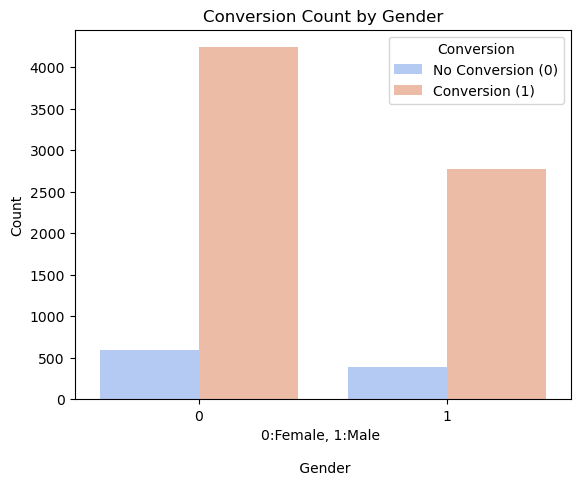

In [24]:
sns.countplot(x='Gender', hue='Conversion', data=df, palette='coolwarm')
plt.title("Conversion Count by Gender", fontsize=12)
plt.xlabel("0:Female, 1:Male \n\n Gender", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.legend(title="Conversion", labels=["No Conversion (0)", "Conversion (1)"])
plt.show()

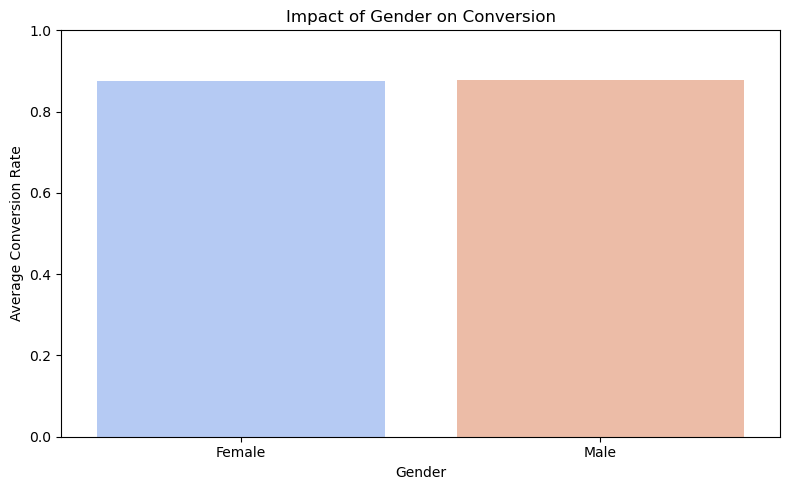

In [25]:
# Calculate average Conversion rate for each Gender
gender_conversion = df.groupby('Gender')['Conversion'].mean().reset_index()

# Map Gender values for better readability (e.g., 0 -> Female, 1 -> Male)
gender_conversion['Gender'] = gender_conversion['Gender'].map({0: 'Female', 1: 'Male'})

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Conversion', data=gender_conversion, palette='coolwarm')
plt.title("Impact of Gender on Conversion", fontsize=12)
plt.xlabel("Gender", fontsize=10)
plt.ylabel("Average Conversion Rate", fontsize=10)
plt.xticks(fontsize=10)
plt.ylim(0, 1)  # Assuming Conversion is binary (0 or 1)
plt.tight_layout()
plt.show()

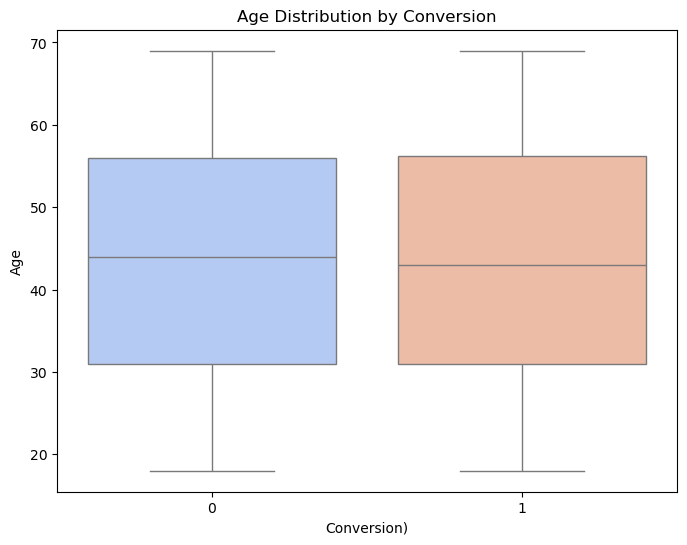

In [26]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='Age', data=df, palette='coolwarm')
plt.title("Age Distribution by Conversion", fontsize=12)
plt.xlabel("Conversion)", fontsize=10)
plt.ylabel("Age", fontsize=10)
plt.show()

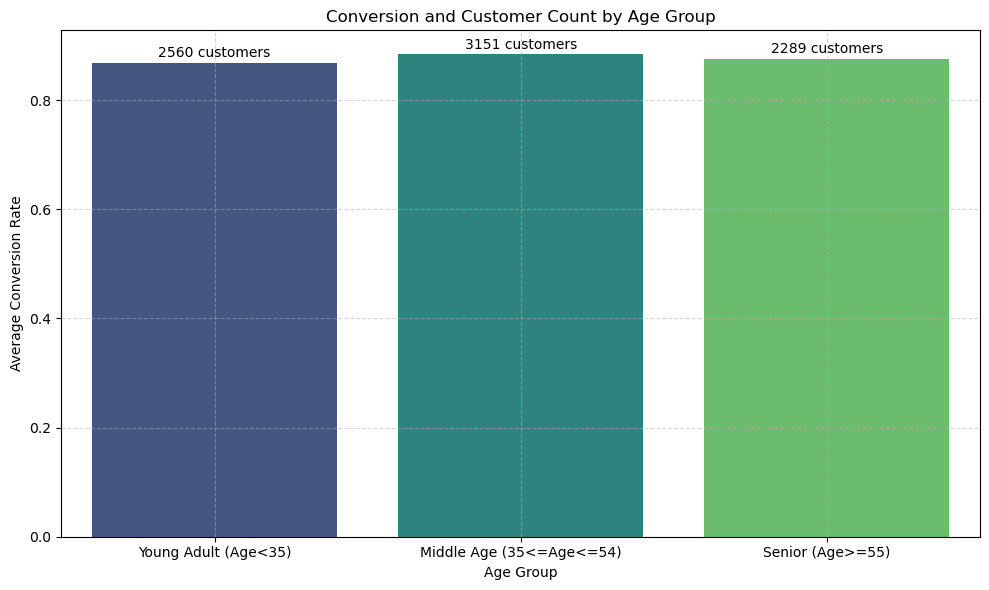

In [27]:
# Create age groups temporarily and calculate both conversion rates and customer counts
age_conversion_data = (
    df.assign(
        AgeGroup=pd.cut(
            df['Age'],
            bins=[0, 34, 54, float('inf')],
            labels=["Young Adult (Age<35)", "Middle Age (35<=Age<=54)", "Senior (Age>=55)"]
        )
    )
    .groupby('AgeGroup')
    .agg(CustomerCount=('Conversion', 'count'), AverageConversion=('Conversion', 'mean'))
    .reset_index()
)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='AverageConversion', data=age_conversion_data, palette='viridis')

# Add labels for customer counts on the bars
for i, row in age_conversion_data.iterrows():
    plt.text(
        i, row.AverageConversion + 0.01, f"{row.CustomerCount} customers",
        color='black', ha='center', fontsize=10
    )

# Add titles and labels
plt.title("Conversion and Customer Count by Age Group", fontsize=12)
plt.xlabel("Age Group", fontsize=10)
plt.ylabel("Average Conversion Rate", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

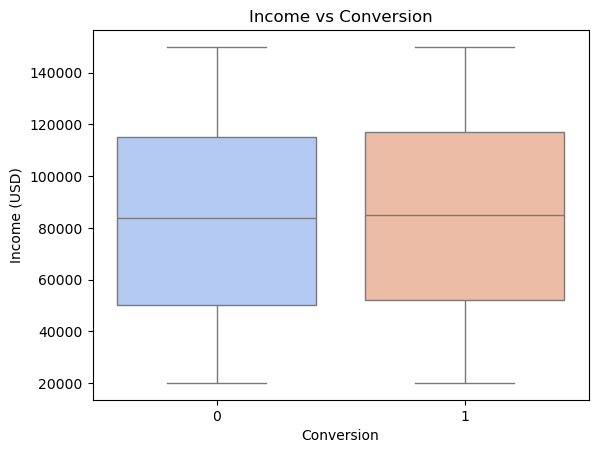

In [28]:
sns.boxplot(x='Conversion', y='Income', data=df, palette='coolwarm')
plt.title("Income vs Conversion", fontsize=12)
plt.xlabel("Conversion", fontsize=10)
plt.ylabel("Income (USD)", fontsize=10)
plt.show()

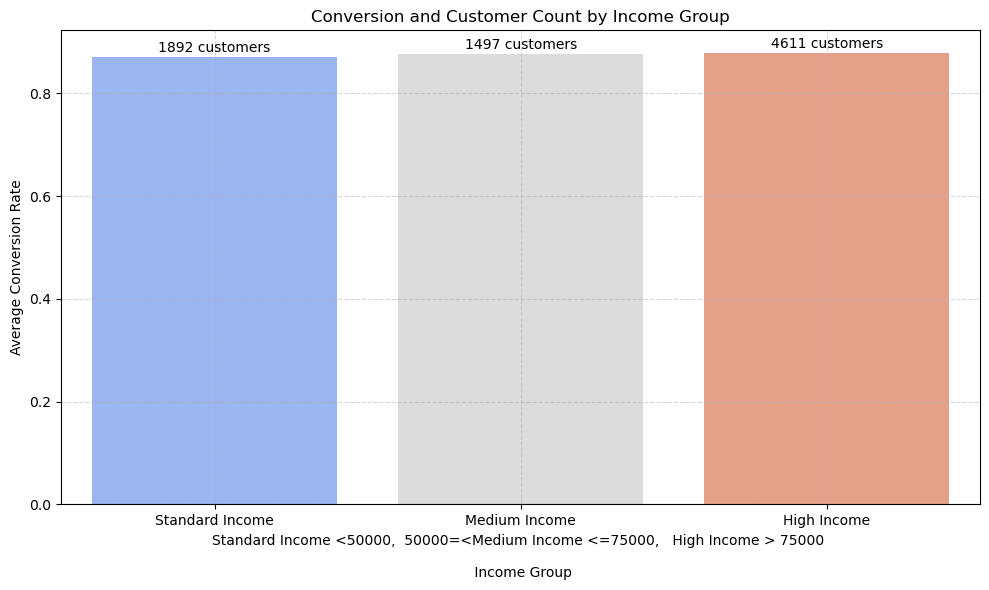

In [29]:
# Create income groups temporarily and calculate both conversion rates and customer counts
income_conversion_data = (
    df.assign(
        IncomeGroup=pd.cut(
            df['Income'],
            bins=[-float('inf'), 49999, 75000, float('inf')],
            labels=["Standard Income", "Medium Income", "High Income"]
        )
    )
    .groupby('IncomeGroup')
    .agg(CustomerCount=('Conversion', 'count'), AverageConversion=('Conversion', 'mean'))
    .reset_index()
)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeGroup', y='AverageConversion', data=income_conversion_data, palette='coolwarm')

# Add labels for customer counts on the bars
for i, row in income_conversion_data.iterrows():
    plt.text(
        i, row.AverageConversion + 0.01, f"{row.CustomerCount} customers",
        color='black', ha='center', fontsize=10
    )

# Add titles and labels
plt.title("Conversion and Customer Count by Income Group", fontsize=12)
plt.xlabel("Standard Income <50000,  50000=<Medium Income <=75000,   High Income > 75000 \n\n Income Group", fontsize=10)
plt.ylabel("Average Conversion Rate", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


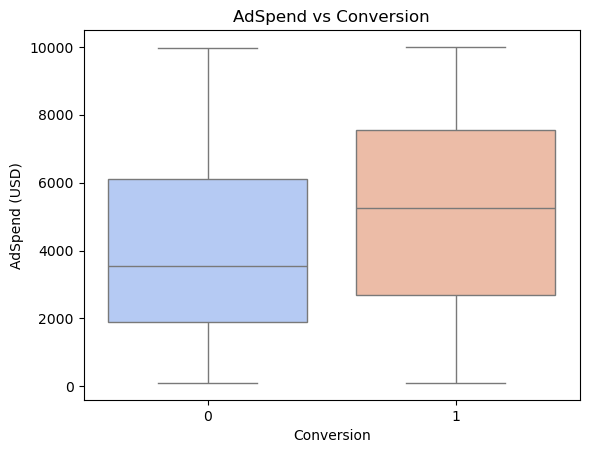

In [30]:
sns.boxplot(x='Conversion', y='AdSpend', data=df, palette='coolwarm')
plt.title("AdSpend vs Conversion", fontsize=12)
plt.xlabel("Conversion", fontsize=10)
plt.ylabel("AdSpend (USD)", fontsize=10)
plt.show()

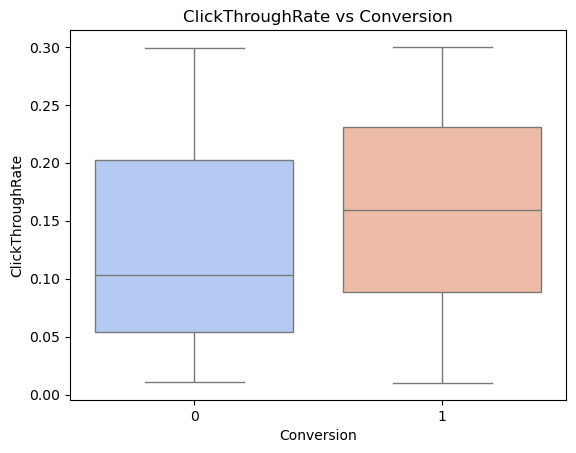

In [31]:
sns.boxplot(x='Conversion', y='ClickThroughRate', data=df, palette='coolwarm')
plt.title("ClickThroughRate vs Conversion", fontsize=12)
plt.xlabel("Conversion", fontsize=10)
plt.ylabel("ClickThroughRate", fontsize=10)
plt.show()

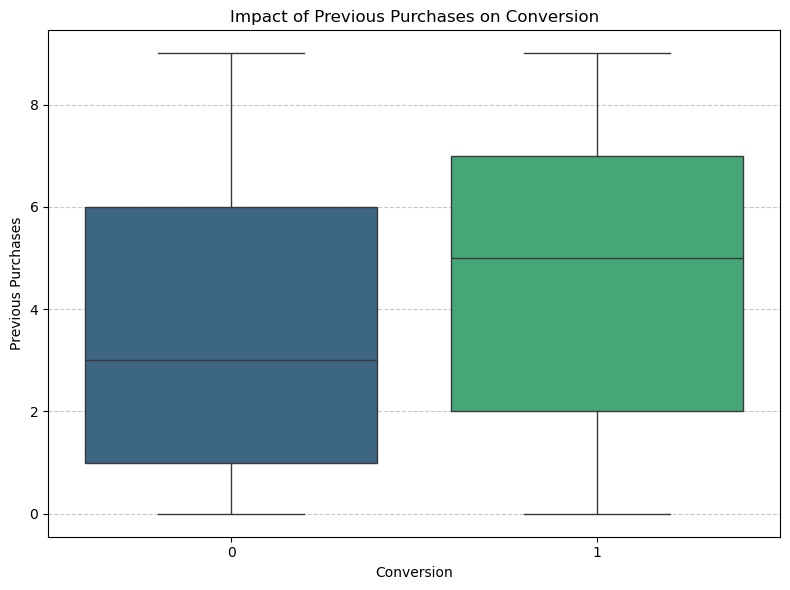

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='PreviousPurchases', data=df, palette='viridis')
plt.title("Impact of Previous Purchases on Conversion", fontsize=12)
plt.xlabel("Conversion", fontsize=10)
plt.ylabel("Previous Purchases", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

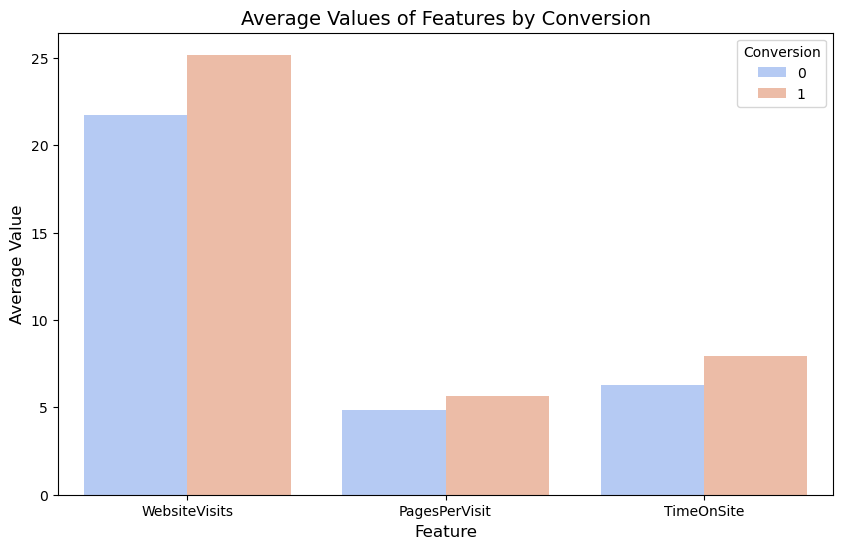

In [33]:
df_grouped = df.groupby('Conversion')[['WebsiteVisits', 'PagesPerVisit', 'TimeOnSite']].mean().reset_index()
df_melted = df_grouped.melt(id_vars='Conversion', var_name='Feature', value_name='Average')
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Average', hue='Conversion', data=df_melted, palette='coolwarm')
plt.title("Average Values of Features by Conversion", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Conversion")
plt.show()

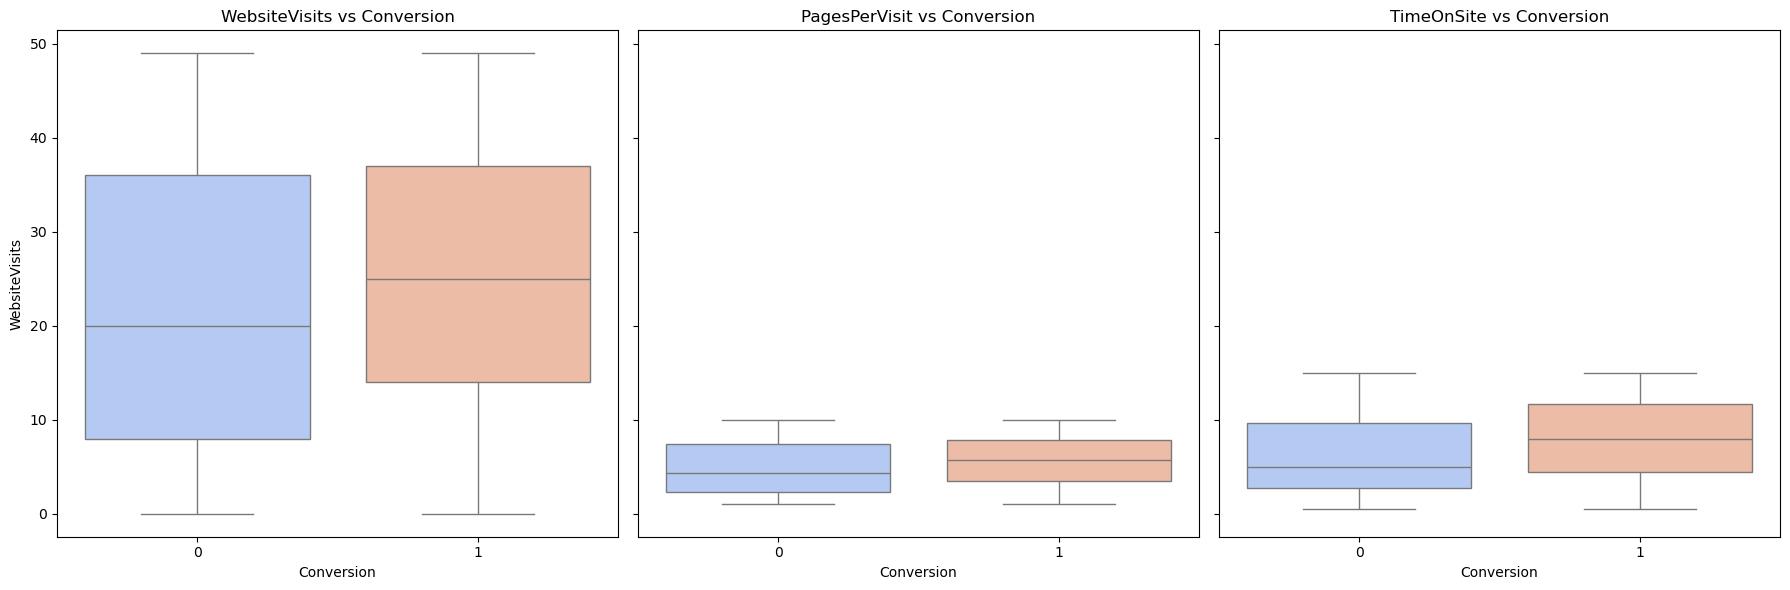

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Box plot for WebsiteVisits
sns.boxplot(x='Conversion', y='WebsiteVisits', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("WebsiteVisits vs Conversion")
axes[0].set_xlabel("Conversion")
axes[0].set_ylabel("WebsiteVisits")

# Box plot for PagesPerVisit
sns.boxplot(x='Conversion', y='PagesPerVisit', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("PagesPerVisit vs Conversion")
axes[1].set_xlabel("Conversion")
axes[1].set_ylabel("PagesPerVisit")

# Box plot for TimeOnSite
sns.boxplot(x='Conversion', y='TimeOnSite', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title("TimeOnSite vs Conversion")
axes[2].set_xlabel("Conversion")
axes[2].set_ylabel("TimeOnSite")

plt.tight_layout()
plt.show()

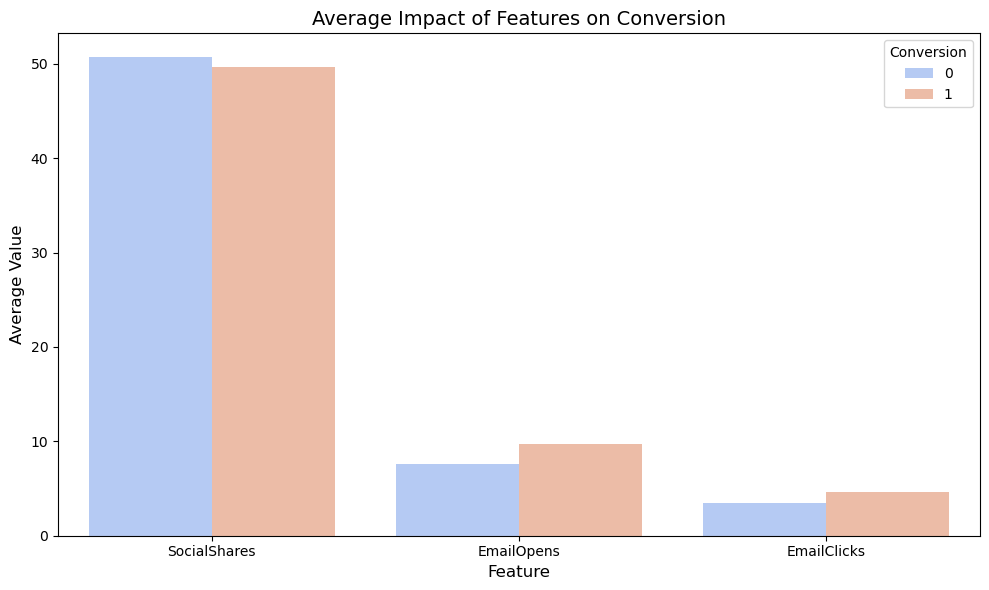

In [35]:
# Group by Conversion and calculate mean for the selected features
grouped_data = df.groupby('Conversion')[['SocialShares', 'EmailOpens', 'EmailClicks']].mean().reset_index()

# Melt the data for a grouped bar chart
melted_data = grouped_data.melt(id_vars='Conversion', var_name='Feature', value_name='Average')

# Plot a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Average', hue='Conversion', data=melted_data, palette='coolwarm')

# Add titles and labels
plt.title("Average Impact of Features on Conversion", fontsize=14)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.legend(title="Conversion")
plt.tight_layout()
plt.show()

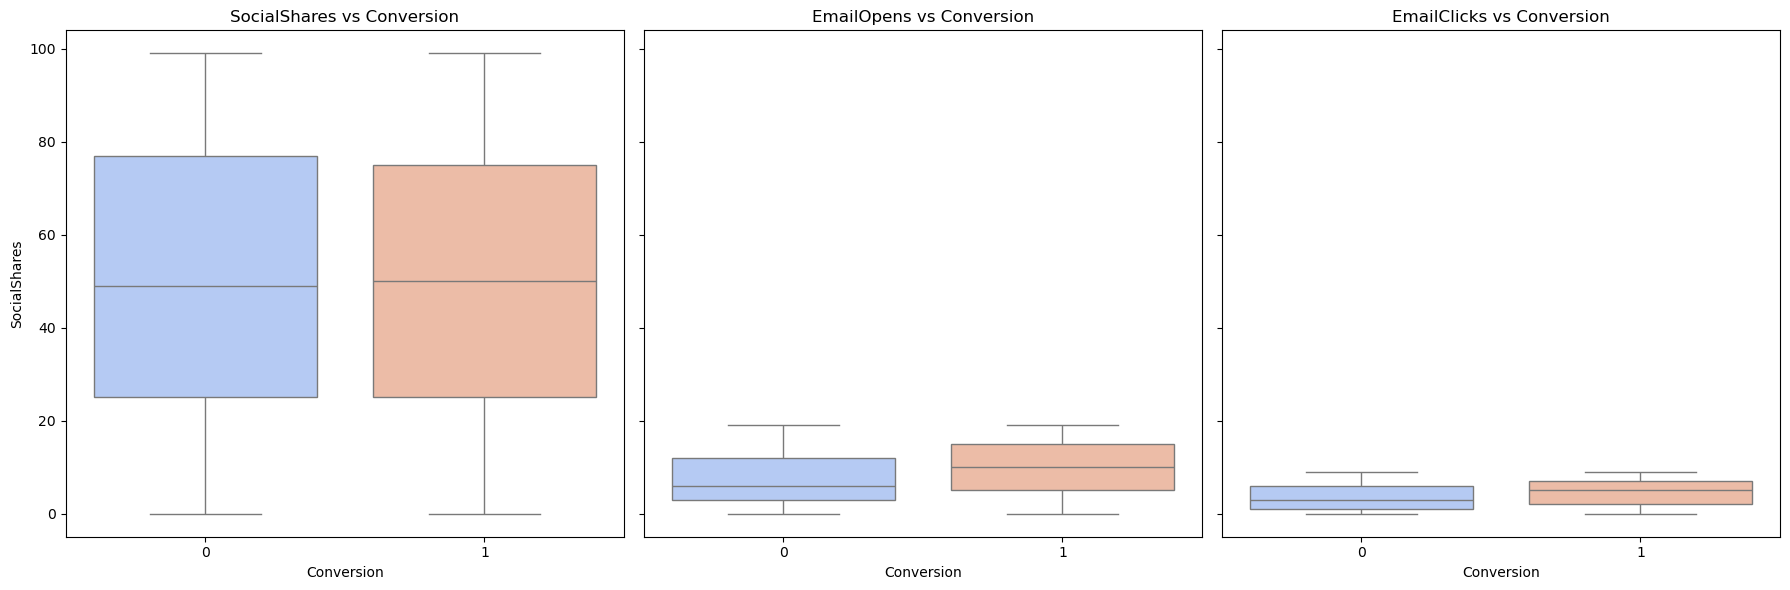

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Box plot for SocialShares
sns.boxplot(x='Conversion', y='SocialShares', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title("SocialShares vs Conversion")
axes[0].set_xlabel("Conversion")
axes[0].set_ylabel("SocialShares")

# Box plot for EmailOpens
sns.boxplot(x='Conversion', y='EmailOpens', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title("EmailOpens vs Conversion")
axes[1].set_xlabel("Conversion")
axes[1].set_ylabel("EmailOpens")

# Box plot for EmailClicks
sns.boxplot(x='Conversion', y='EmailClicks', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title("EmailClicks vs Conversion")
axes[2].set_xlabel("Conversion")
axes[2].set_ylabel("EmailClicks")

plt.tight_layout()
plt.show()


In [37]:
df_groupby_CampaignChannel_CampaignType = df.groupby(['CampaignChannel', 'CampaignType']).mean().reset_index()

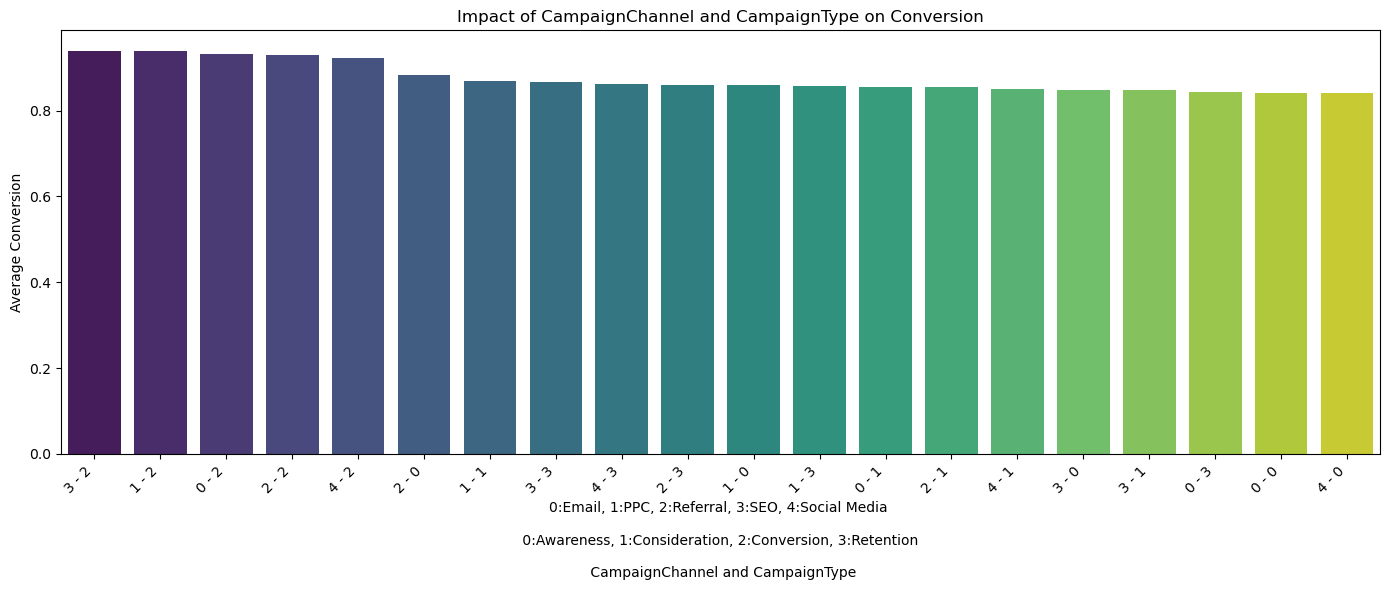

In [38]:
# Extract relevant columns and sort by Conversion
data_to_plot = df_groupby_CampaignChannel_CampaignType[['CampaignChannel', 'CampaignType', 'Conversion']].sort_values(by='Conversion', ascending=False)

# Ensure both columns are treated as strings
data_to_plot['Channel_Type'] = data_to_plot['CampaignChannel'].astype(str) + " - " + data_to_plot['CampaignType'].astype(str)

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel_Type', y='Conversion', data=data_to_plot, palette='viridis')

# Add titles and labels
plt.title("Impact of CampaignChannel and CampaignType on Conversion", fontsize=12)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media \n\n 0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignChannel and CampaignType", fontsize=10)
plt.ylabel("Average Conversion", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


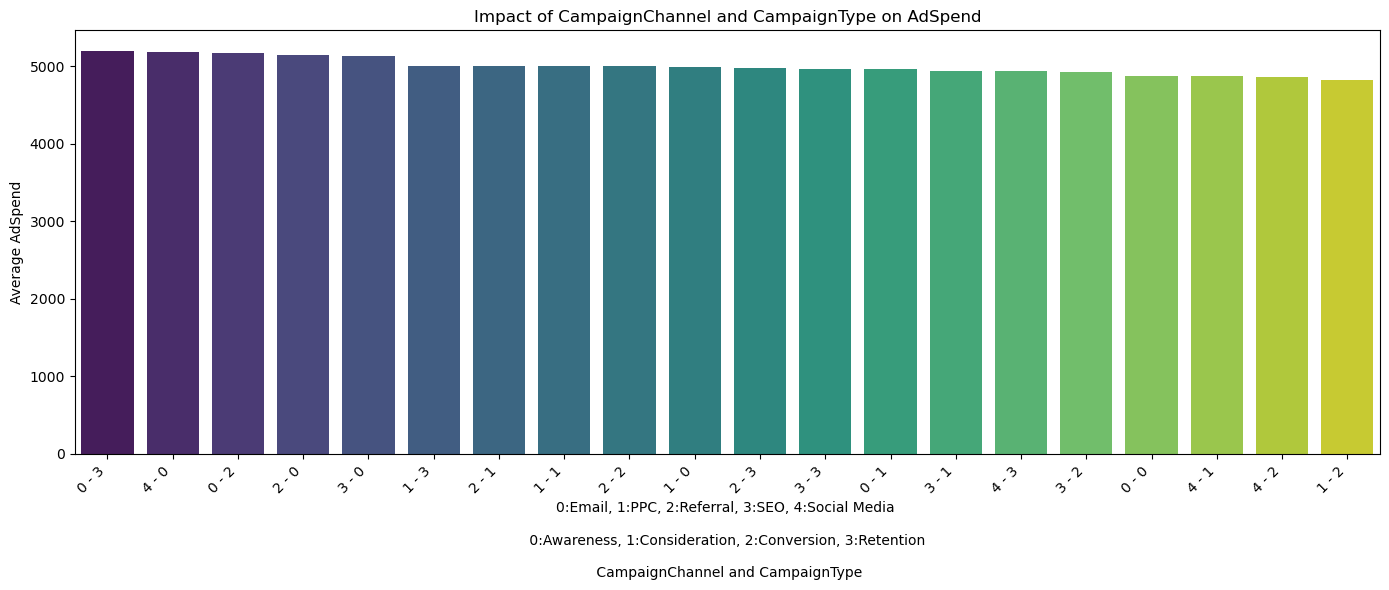

In [39]:
# Extract relevant columns and sort by AdSpend
data_to_plot = df_groupby_CampaignChannel_CampaignType[['CampaignChannel', 'CampaignType', 'AdSpend']].sort_values(by='AdSpend', ascending=False)

# Combine CampaignChannel and CampaignType into one column for unique labels
data_to_plot['Channel_Type'] = data_to_plot['CampaignChannel'].astype(str) + " - " + data_to_plot['CampaignType'].astype(str)

# Plot bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x='Channel_Type', y='AdSpend', data=data_to_plot, palette='viridis')

# Add titles and labels

plt.title("Impact of CampaignChannel and CampaignType on AdSpend", fontsize=12)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media \n\n 0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignChannel and CampaignType", fontsize=10)
plt.ylabel("Average AdSpend", fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


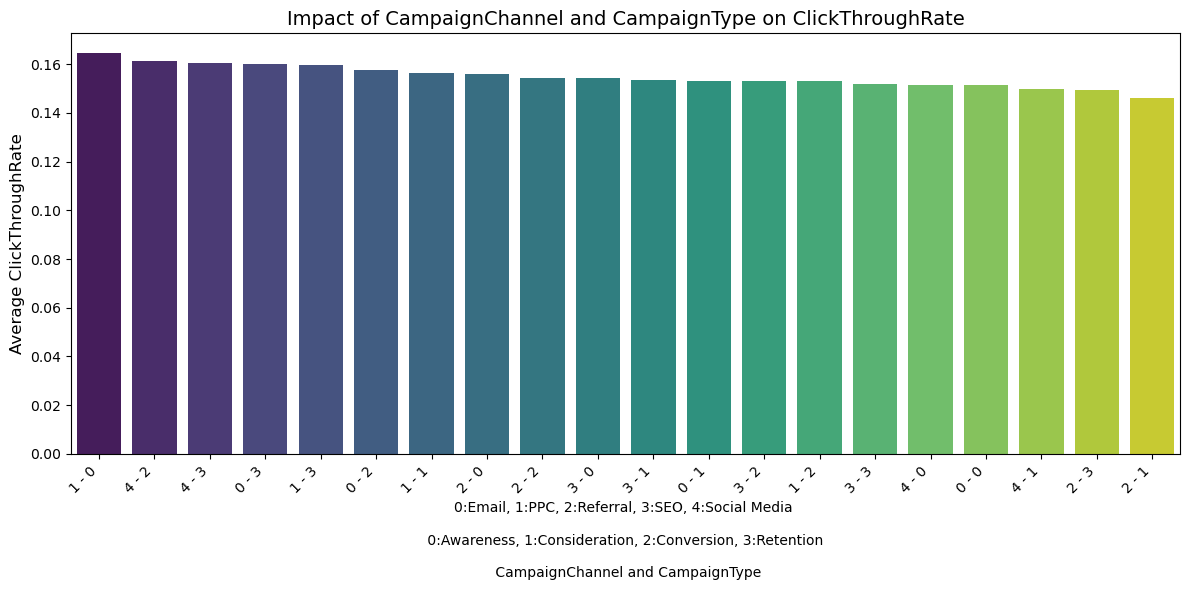

In [40]:
# Combine CampaignChannel and CampaignType during grouping
grouped_data = (
    df.groupby(df['CampaignChannel'].astype(str) + " - " + df['CampaignType'].astype(str))['ClickThroughRate']
    .mean()
    .reset_index()
)

# Rename the combined column for clarity
grouped_data.rename(columns={grouped_data.columns[0]: 'Channel_Type'}, inplace=True)

# Sort the data by ClickThroughRate for better visualization
grouped_data = grouped_data.sort_values(by='ClickThroughRate', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel_Type', y='ClickThroughRate', data=grouped_data, palette='viridis')
plt.title("Impact of CampaignChannel and CampaignType on ClickThroughRate", fontsize=14)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media \n\n 0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignChannel and CampaignType", fontsize=10)
plt.ylabel("Average ClickThroughRate", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

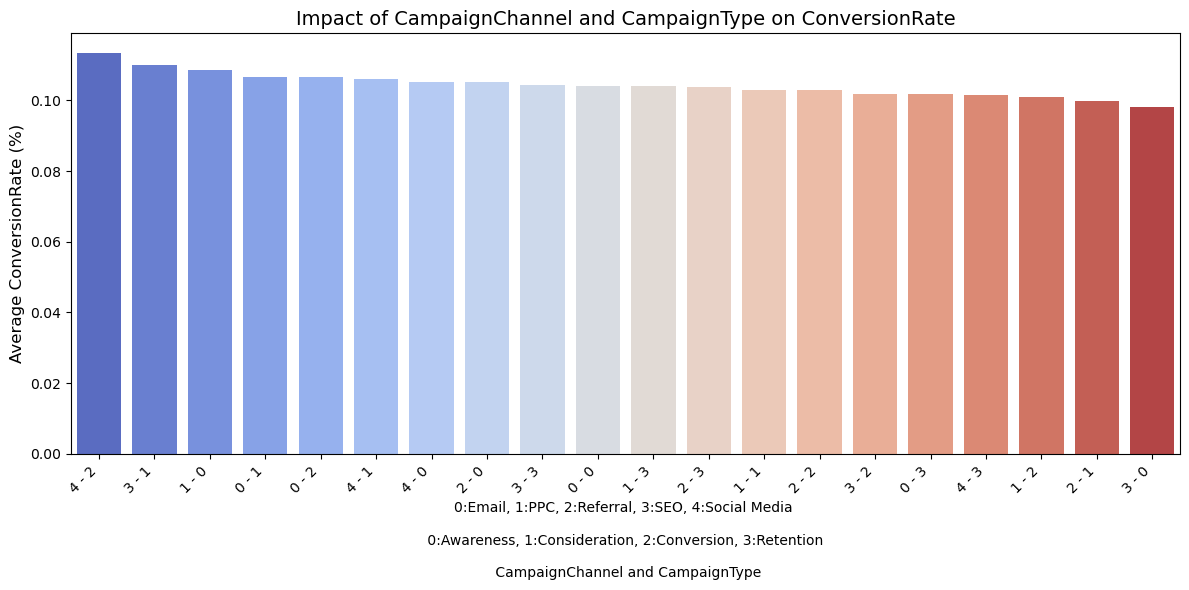

In [41]:
# Combine CampaignChannel and CampaignType during grouping
grouped_data = (
    df.groupby(df['CampaignChannel'].astype(str) + " - " + df['CampaignType'].astype(str))['ConversionRate']
    .mean()
    .reset_index()
)

# Rename the combined column for clarity
grouped_data.rename(columns={grouped_data.columns[0]: 'Channel_Type'}, inplace=True)

# Sort the data by ConversionRate for better visualization
grouped_data = grouped_data.sort_values(by='ConversionRate', ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Channel_Type', y='ConversionRate', data=grouped_data, palette='coolwarm')
plt.title("Impact of CampaignChannel and CampaignType on ConversionRate", fontsize=14)
plt.xlabel("0:Email, 1:PPC, 2:Referral, 3:SEO, 4:Social Media \n\n 0:Awareness, 1:Consideration, 2:Conversion, 3:Retention \n\n CampaignChannel and CampaignType", fontsize=10)
plt.ylabel("Average ConversionRate (%)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

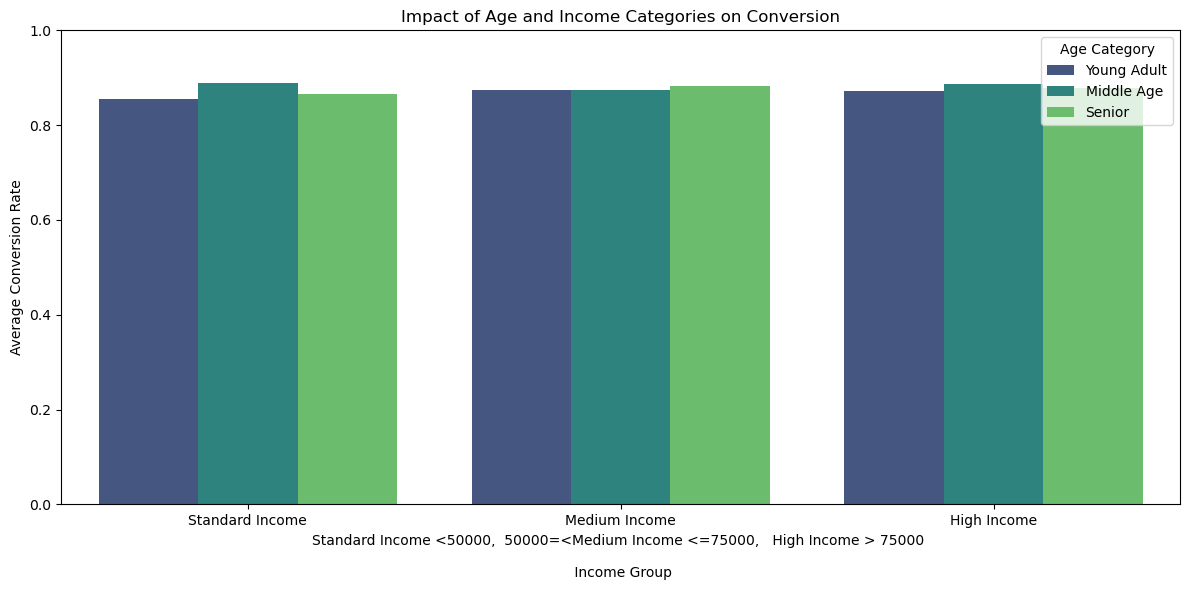

In [42]:
# Categorize Age and Income during grouping without modifying the original dataset
age_bins = [0, 35, 54, float('inf')]
age_labels = ['Young Adult', 'Middle Age', 'Senior']

income_bins = [0, 50000, 75000, float('inf')]
income_labels = ['Standard Income', 'Medium Income', 'High Income']

# Create grouped data with categorized Age and Income
grouped_data = (
    df.groupby([
        pd.cut(df['Age'], bins=age_bins, labels=age_labels),
        pd.cut(df['Income'], bins=income_bins, labels=income_labels)
    ])['Conversion']
    .mean()
    .reset_index()
)

# Rename columns for clarity
grouped_data.columns = ['AgeCategory', 'IncomeCategory', 'Conversion']

# Plot the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='IncomeCategory', y='Conversion', hue='AgeCategory', data=grouped_data, palette='viridis')
plt.title("Impact of Age and Income Categories on Conversion", fontsize=12)
plt.xlabel("Standard Income <50000,  50000=<Medium Income <=75000,   High Income > 75000 \n\n Income Group", fontsize=10)
plt.ylabel("Average Conversion Rate", fontsize=10)
plt.legend(title="Age Category")
plt.ylim(0, 1)  # Assuming Conversion is binary (0 or 1)
plt.tight_layout()
plt.show()

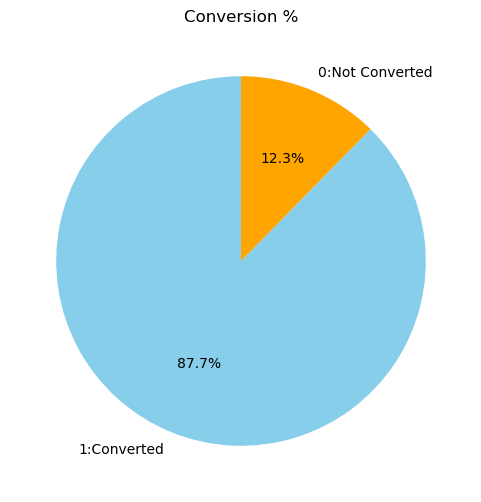

In [43]:
conversion = df['Conversion'].value_counts()
labels = ['1:Converted', '0:Not Converted']
plt.figure(figsize=(6, 6))
plt.pie(conversion, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Conversion %')
plt.show()

In [44]:
df.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,0,136912,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,1,41760,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,0,88456,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,0,44085,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,0,83964,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


# Feature Engineering

### Recursive feature elimination (RFE)

#### Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X = df.drop(columns=['Conversion'])
y = df['Conversion']
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 11 attributes / 11 features from your input data X
rfe = RFE(estimator=model, n_features_to_select=11)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'CampaignChannel', 'CampaignType', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases']


### Feature ranking with recursive feature elimination (RFE) and cross-validation

#### RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 11
Selected features: ['Age', 'CampaignChannel', 'CampaignType', 'ClickThroughRate', 'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'EmailOpens', 'EmailClicks', 'PreviousPurchases']


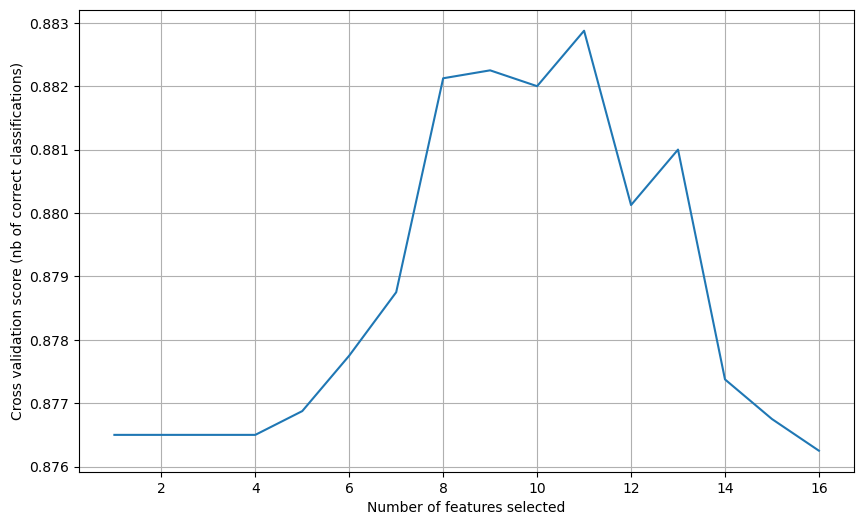

In [46]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.grid(True)
plt.show()

In [47]:
df.drop(columns=["Age","Gender","Income"], axis =1, inplace= True)

In [48]:
df.head()

,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,4,0,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,0,3,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,1,0,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,1,2,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,1,2,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


# Data Splitting


In [49]:
X = df.drop(columns=['Conversion'])
y = df['Conversion']

In [50]:
X_train_beforeSmote, X_test, y_train_beforeSmote, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE

#### Target variable "Conversion" is imbalanced with 87.7% for "Conversion" and 12.3% for "No Conversion". Using SMOTE (Synthetic Minority Over-sampling Technique) we can balance dataset by generating synthetic samples for the minority class ("No Conversion").

In [51]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_beforeSmote, y_train_beforeSmote)

In [52]:
print("Before SMOTE:", y_train_beforeSmote.value_counts())
print("After SMOTE:", pd.Series(y_train).value_counts())

Before SMOTE: Conversion
1    5610
0     790
Name: count, dtype: int64
After SMOTE: Conversion
1    5610
0    5610
Name: count, dtype: int64


# Feature Scaling

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [54]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    print("\nConfusion Matrix:")
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')

    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})", color="blue")
    plt.title("Precision-Recall Curve for Best Model", fontsize=12)
    plt.xlabel("Recall", fontsize=10)
    plt.ylabel("Precision", fontsize=10)
    plt.legend(loc="lower left")
    plt.grid()

    plt.tight_layout()
    plt.show()

    cr = classification_report(y_test, y_pred, output_dict=True)

    print("\nClassification Report:")
    crt = pd.DataFrame(cr).T
    print(crt.to_markdown())

    precision = cr['weighted avg']['precision']
    recall = cr['weighted avg']['recall']
    f1 = cr['weighted avg']['f1-score']
    accuracy = accuracy_score(y_test, y_pred)

    model_score = [accuracy, precision, recall, f1, pr_auc]
    return model_score

In [55]:
score = pd.DataFrame(index = ['Accuracy','Precision','Recall', 'F1-Score', 'Precision-Recall Curve'])

### 1 : Logistic Regression

In [56]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()


Confusion Matrix:


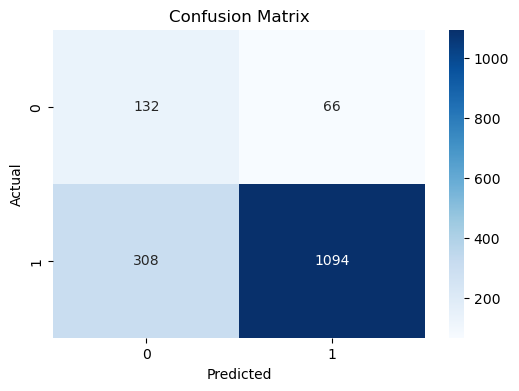

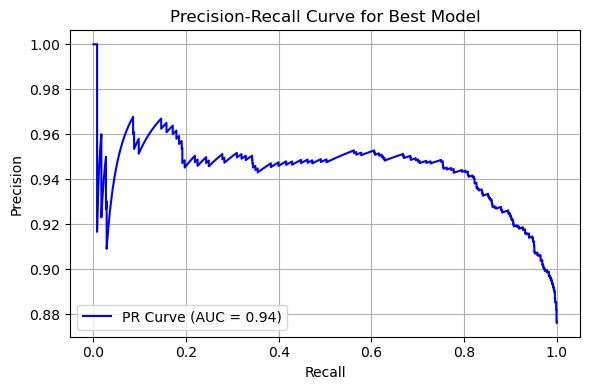


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.3      | 0.666667 |   0.413793 |  198       |
| 1            |    0.943103 | 0.780314 |   0.85402  | 1402       |
| accuracy     |    0.76625  | 0.76625  |   0.76625  |    0.76625 |
| macro avg    |    0.621552 | 0.72349  |   0.633907 | 1600       |
| weighted avg |    0.863519 | 0.76625  |   0.799542 | 1600       |


In [57]:
model_1_score = evaluate_model(model_1, X_train, X_test, y_train, y_test)

In [58]:
score['Logistic regression'] = model_1_score
score

,Logistic regression
Accuracy,0.766250
Precision,0.863519
Recall,0.766250
F1-Score,0.799542
Precision-Recall Curve,0.944335


### 2 : Support Vector Machines (SVM)

In [59]:
model_2 = SVC(probability=True)
model_2.fit(X_train, y_train)

SVC(probability=True)


Confusion Matrix:


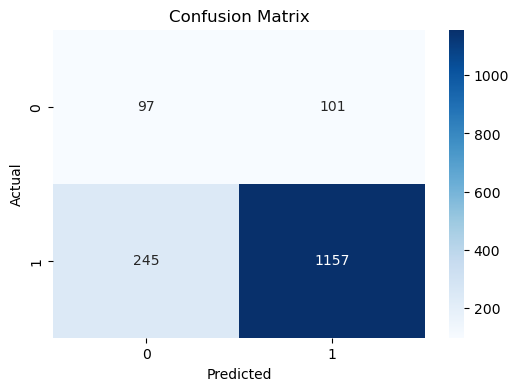

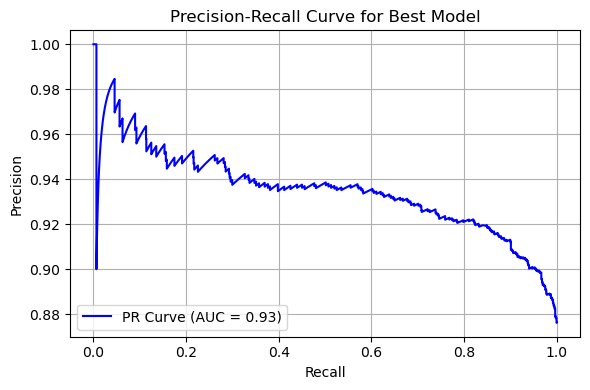


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.283626 | 0.489899 |   0.359259 |  198       |
| 1            |    0.919714 | 0.82525  |   0.869925 | 1402       |
| accuracy     |    0.78375  | 0.78375  |   0.78375  |    0.78375 |
| macro avg    |    0.60167  | 0.657574 |   0.614592 | 1600       |
| weighted avg |    0.840998 | 0.78375  |   0.80673  | 1600       |


In [60]:
model_2_score = evaluate_model(model_2, X_train, X_test, y_train, y_test)

In [61]:
score['SVM'] = model_2_score
score

,Logistic regression,SVM
Accuracy,0.766250,0.783750
Precision,0.863519,0.840998
Recall,0.766250,0.783750
F1-Score,0.799542,0.806730
Precision-Recall Curve,0.944335,0.934957


### 3 : Decision Tree

In [62]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train, y_train)

DecisionTreeClassifier()


Confusion Matrix:


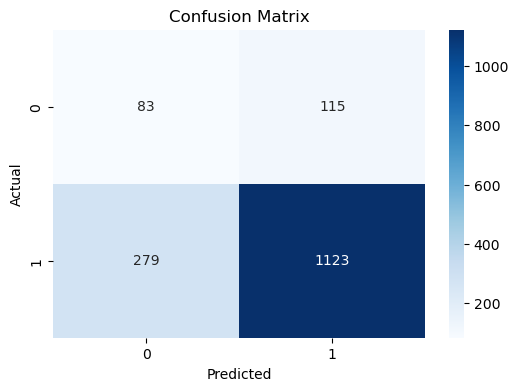

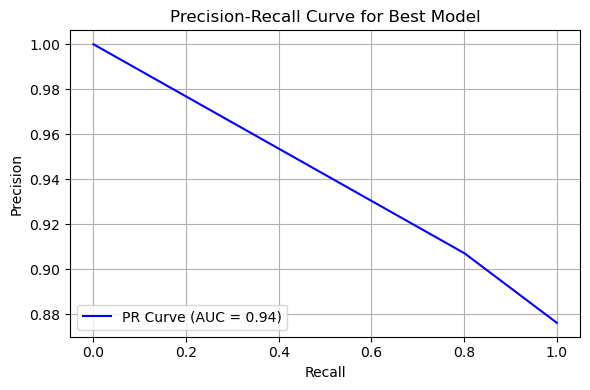


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.229282 | 0.419192 |   0.296429 |  198       |
| 1            |    0.907108 | 0.800999 |   0.850758 | 1402       |
| accuracy     |    0.75375  | 0.75375  |   0.75375  |    0.75375 |
| macro avg    |    0.568195 | 0.610095 |   0.573593 | 1600       |
| weighted avg |    0.823227 | 0.75375  |   0.782159 | 1600       |


In [63]:
model_3_score = evaluate_model(model_3, X_train, X_test, y_train, y_test)

In [64]:
score['Decision Tree'] = model_3_score
score

,Logistic regression,SVM,Decision Tree
Accuracy,0.766250,0.783750,0.753750
Precision,0.863519,0.840998,0.823227
Recall,0.766250,0.783750,0.753750
F1-Score,0.799542,0.806730,0.782159
Precision-Recall Curve,0.944335,0.934957,0.941241


### 4 : K-Nearest Neighbors (KNN)

In [65]:
model_4 = KNeighborsClassifier()
model_4.fit(X_train, y_train)

KNeighborsClassifier()


Confusion Matrix:


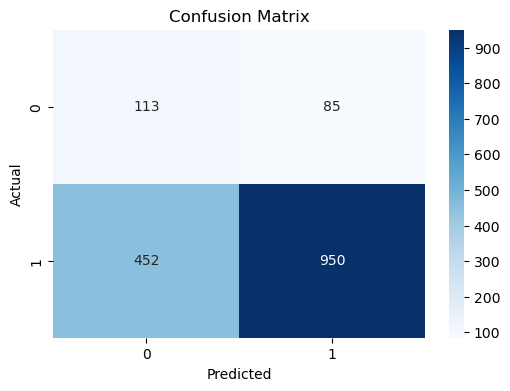

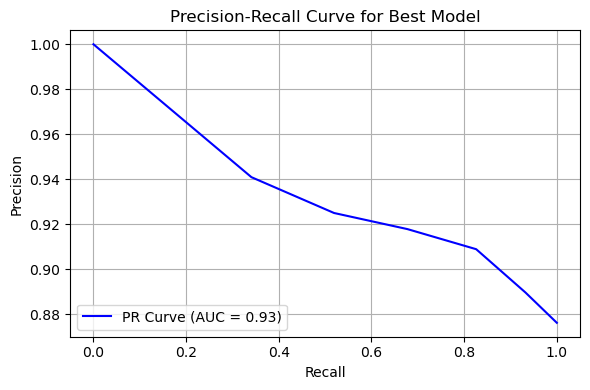


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.2      | 0.570707 |   0.296199 |  198        |
| 1            |    0.917874 | 0.677603 |   0.779647 | 1402        |
| accuracy     |    0.664375 | 0.664375 |   0.664375 |    0.664375 |
| macro avg    |    0.558937 | 0.624155 |   0.537923 | 1600        |
| weighted avg |    0.829037 | 0.664375 |   0.71982  | 1600        |


In [66]:
model_4_score = evaluate_model(model_4, X_train, X_test, y_train, y_test)

In [67]:
score['KNN'] = model_4_score
score

,Logistic regression,SVM,Decision Tree,KNN
Accuracy,0.766250,0.783750,0.753750,0.664375
Precision,0.863519,0.840998,0.823227,0.829037
Recall,0.766250,0.783750,0.753750,0.664375
F1-Score,0.799542,0.806730,0.782159,0.719820
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072


### 5 : Random Forest

In [68]:
model_5 = RandomForestClassifier()
model_5.fit(X_train, y_train)

RandomForestClassifier()


Confusion Matrix:


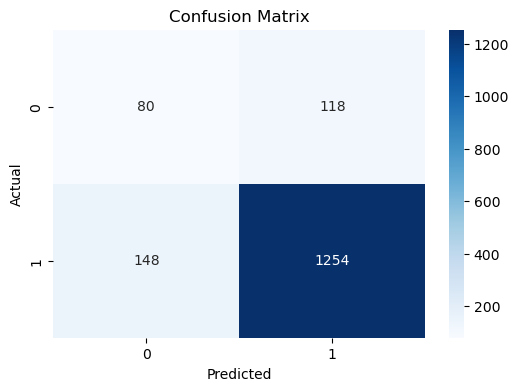

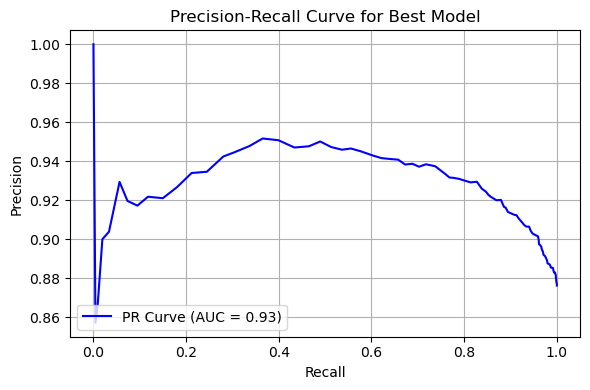


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.350877 | 0.40404  |   0.375587 |  198       |
| 1            |    0.913994 | 0.894437 |   0.90411  | 1402       |
| accuracy     |    0.83375  | 0.83375  |   0.83375  |    0.83375 |
| macro avg    |    0.632436 | 0.649238 |   0.639848 | 1600       |
| weighted avg |    0.844308 | 0.83375  |   0.838705 | 1600       |


In [69]:
model_5_score = evaluate_model(model_5, X_train, X_test, y_train, y_test)

In [70]:
score['RandomForest'] = model_5_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750
Precision,0.863519,0.840998,0.823227,0.829037,0.844308
Recall,0.766250,0.783750,0.753750,0.664375,0.833750
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371


### 6 : AdaBoost

In [71]:
model_6 = AdaBoostClassifier()
model_6.fit(X_train, y_train)

AdaBoostClassifier()


Confusion Matrix:


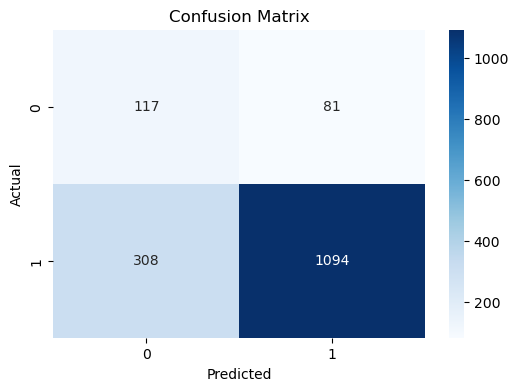

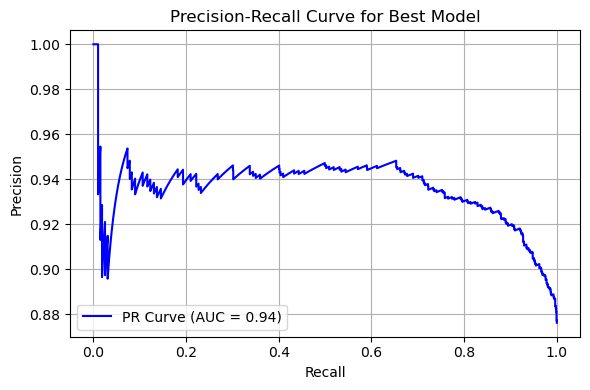


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.275294 | 0.590909 |   0.375602 |  198        |
| 1            |    0.931064 | 0.780314 |   0.849049 | 1402        |
| accuracy     |    0.756875 | 0.756875 |   0.756875 |    0.756875 |
| macro avg    |    0.603179 | 0.685611 |   0.612326 | 1600        |
| weighted avg |    0.849912 | 0.756875 |   0.79046  | 1600        |


In [72]:
model_6_score = evaluate_model(model_6, X_train, X_test, y_train, y_test)

In [73]:
score['AdaBoost'] = model_6_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest,AdaBoost
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875
Precision,0.863519,0.840998,0.823227,0.829037,0.844308,0.849912
Recall,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705,0.790460
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371,0.935870


### 7 : GradientBoost

In [74]:
model_7 = GradientBoostingClassifier()
model_7.fit(X_train, y_train)

GradientBoostingClassifier()


Confusion Matrix:


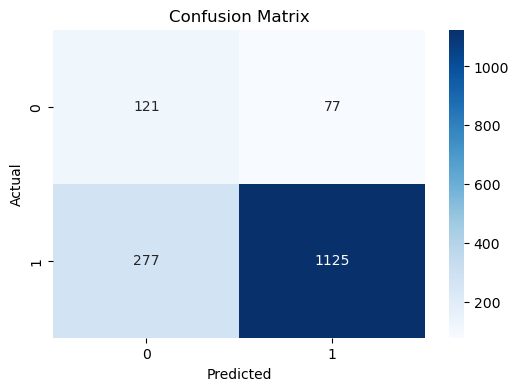

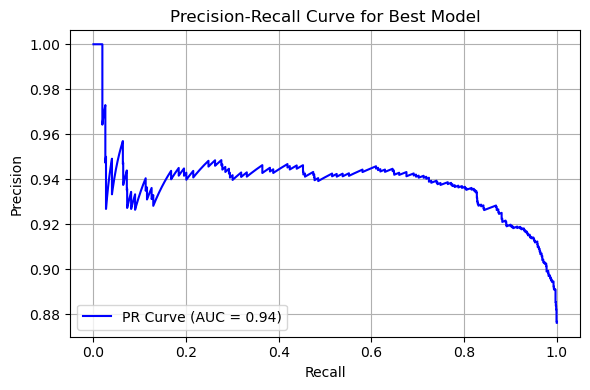


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |     0.30402 | 0.611111 |   0.40604  |  198       |
| 1            |     0.93594 | 0.802425 |   0.864055 | 1402       |
| accuracy     |     0.77875 | 0.77875  |   0.77875  |    0.77875 |
| macro avg    |     0.61998 | 0.706768 |   0.635048 | 1600       |
| weighted avg |     0.85774 | 0.77875  |   0.807376 | 1600       |


In [75]:
model_7_score = evaluate_model(model_7, X_train, X_test, y_train, y_test)

In [76]:
score['GradientBoost'] = model_7_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest,AdaBoost,GradientBoost
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750
Precision,0.863519,0.840998,0.823227,0.829037,0.844308,0.849912,0.857740
Recall,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705,0.790460,0.807376
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371,0.935870,0.938420


### 8 : XGBoost

In [77]:
model_8 = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
model_8.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


Confusion Matrix:


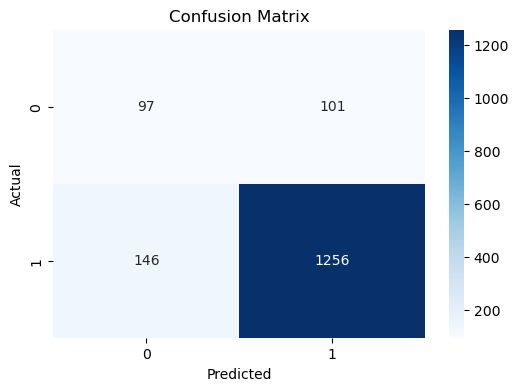

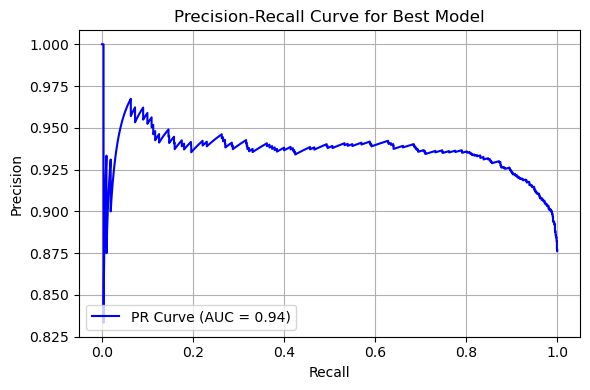


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.399177 | 0.489899 |   0.439909 |  198        |
| 1            |    0.925571 | 0.895863 |   0.910475 | 1402        |
| accuracy     |    0.845625 | 0.845625 |   0.845625 |    0.845625 |
| macro avg    |    0.662374 | 0.692881 |   0.675192 | 1600        |
| weighted avg |    0.86043  | 0.845625 |   0.852242 | 1600        |


In [78]:
model_8_score = evaluate_model(model_8, X_train, X_test, y_train, y_test)

In [79]:
score['XGBoost'] = model_8_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest,AdaBoost,GradientBoost,XGBoost
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625
Precision,0.863519,0.840998,0.823227,0.829037,0.844308,0.849912,0.857740,0.860430
Recall,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705,0.790460,0.807376,0.852242
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371,0.935870,0.938420,0.936221


### 9 : LightGBM

In [80]:
model_9 = LGBMClassifier()
model_9.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5610, number of negative: 5610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 11220, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()


Confusion Matrix:


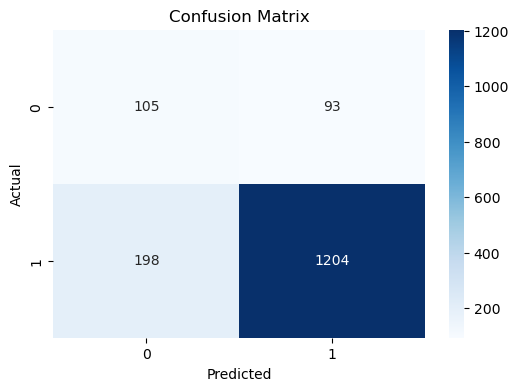

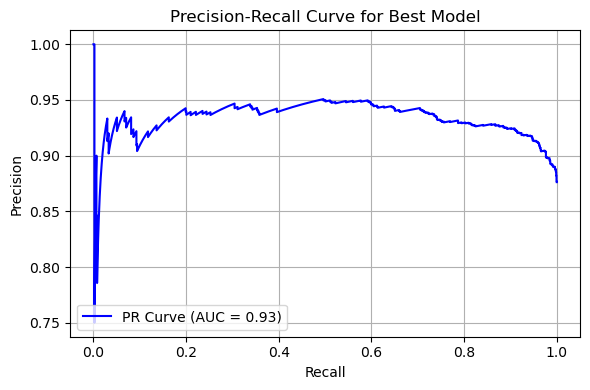


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.346535 | 0.530303 |   0.419162 |  198        |
| 1            |    0.928296 | 0.858773 |   0.892182 | 1402        |
| accuracy     |    0.818125 | 0.818125 |   0.818125 |    0.818125 |
| macro avg    |    0.637415 | 0.694538 |   0.655672 | 1600        |
| weighted avg |    0.856303 | 0.818125 |   0.833646 | 1600        |


In [81]:
model_9_score = evaluate_model(model_9, X_train, X_test, y_train, y_test)

In [82]:
score['LightGBM'] = model_9_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest,AdaBoost,GradientBoost,XGBoost,LightGBM
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625,0.818125
Precision,0.863519,0.840998,0.823227,0.829037,0.844308,0.849912,0.857740,0.860430,0.856303
Recall,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625,0.818125
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705,0.790460,0.807376,0.852242,0.833646
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371,0.935870,0.938420,0.936221,0.933058


### 10 : CatBoost

In [83]:
model_10 = CatBoostClassifier(verbose=0)
model_10.fit(X_train, y_train)


Confusion Matrix:


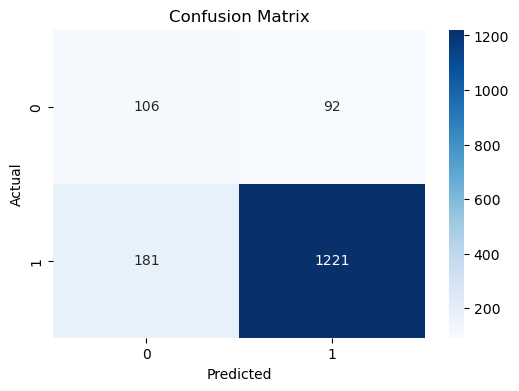

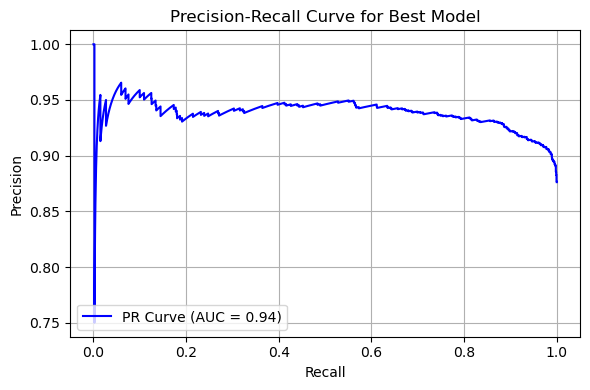


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.369338 | 0.535354 |   0.437113 |  198        |
| 1            |    0.929931 | 0.870899 |   0.899448 | 1402        |
| accuracy     |    0.829375 | 0.829375 |   0.829375 |    0.829375 |
| macro avg    |    0.649635 | 0.703126 |   0.66828  | 1600        |
| weighted avg |    0.860558 | 0.829375 |   0.842234 | 1600        |


In [84]:
model_10_score = evaluate_model(model_10, X_train, X_test, y_train, y_test)

In [85]:
score['CatBoost'] = model_10_score
score

,Logistic regression,SVM,Decision Tree,KNN,RandomForest,AdaBoost,GradientBoost,XGBoost,LightGBM,CatBoost
Accuracy,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625,0.818125,0.829375
Precision,0.863519,0.840998,0.823227,0.829037,0.844308,0.849912,0.857740,0.860430,0.856303,0.860558
Recall,0.766250,0.783750,0.753750,0.664375,0.833750,0.756875,0.778750,0.845625,0.818125,0.829375
F1-Score,0.799542,0.806730,0.782159,0.719820,0.838705,0.790460,0.807376,0.852242,0.833646,0.842234
Precision-Recall Curve,0.944335,0.934957,0.941241,0.934072,0.931371,0.935870,0.938420,0.936221,0.933058,0.938152


### Choose top 4 best models based on F1-Score for Cross Validation & Hyperparameter Tuning





In [86]:
# Extract the F1-Score row
f1_scores = score.loc["F1-Score"]

# Sort the F1-Scores in descending order and get the top 4 model names
top_4_models = f1_scores.sort_values(ascending=False).head(4).index

# Filter the DataFrame for the top 4 models
top_score = score[top_4_models]

# Display the top 4 models' data
print("Top 4 Models Based on F1-Score:")
top_score

Top 4 Models Based on F1-Score:


,XGBoost,CatBoost,RandomForest,LightGBM
Accuracy,0.845625,0.829375,0.833750,0.818125
Precision,0.860430,0.860558,0.844308,0.856303
Recall,0.845625,0.829375,0.833750,0.818125
F1-Score,0.852242,0.842234,0.838705,0.833646
Precision-Recall Curve,0.936221,0.938152,0.931371,0.933058


### 11: CatBoost - Cross Validation & Hyperparameter Tuning



In [87]:
param_grid = {
    'iterations': [100, 200, 300],          # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],     # Step size for each iteration
    'depth': [4, 6, 8],                    # Depth of the tree
    'l2_leaf_reg': [1, 3, 5],              # Regularization term for leaf weights
    'border_count': [32, 64, 128],         # Number of splits for numerical features
    'bagging_temperature': [0.1, 0.5, 1], # Controls randomness of bagging
    'random_strength': [0.1, 0.5, 1],     # Randomness in scoring splits
}

In [88]:
catboost_model = CatBoostClassifier(verbose=0)
grid_search_cb = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_grid, n_iter=10, scoring='f1', cv=5, n_jobs=-1,random_state=42)

In [89]:
grid_search_cb.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x00000117734A9460>,
                   n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.1, 0.5, 1],
                                        'border_count': [32, 64, 128],
                                        'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'l2_leaf_reg': [1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'random_strength': [0.1, 0.5, 1]},
                   random_state=42, scoring='f1')

In [90]:
best_cb_model = grid_search_cb.best_estimator_


Confusion Matrix:


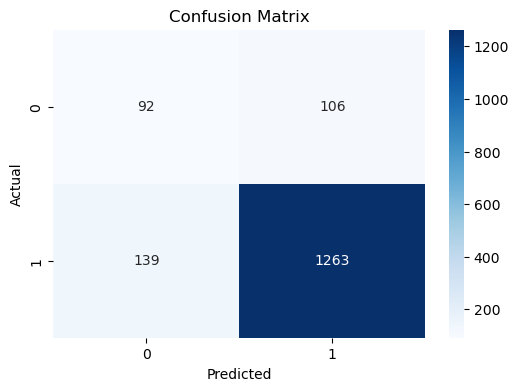

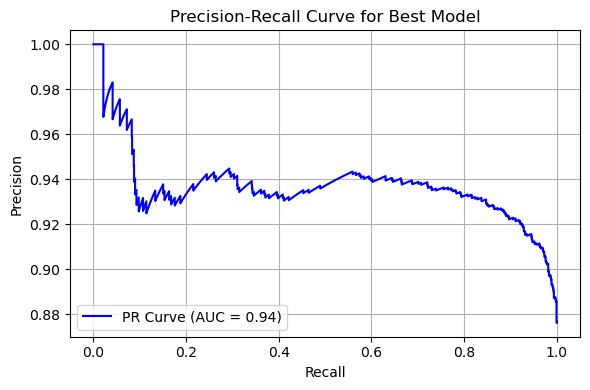


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.398268 | 0.464646 |   0.428904 |  198        |
| 1            |    0.922571 | 0.900856 |   0.911584 | 1402        |
| accuracy     |    0.846875 | 0.846875 |   0.846875 |    0.846875 |
| macro avg    |    0.66042  | 0.682751 |   0.670244 | 1600        |
| weighted avg |    0.857689 | 0.846875 |   0.851853 | 1600        |


In [91]:
model_cb_score = evaluate_model(best_cb_model, X_train, X_test, y_train, y_test)

In [92]:
top_score['CatBoost-Tuned'] = model_cb_score
top_score

,XGBoost,CatBoost,RandomForest,LightGBM,CatBoost-Tuned
Accuracy,0.845625,0.829375,0.833750,0.818125,0.846875
Precision,0.860430,0.860558,0.844308,0.856303,0.857689
Recall,0.845625,0.829375,0.833750,0.818125,0.846875
F1-Score,0.852242,0.842234,0.838705,0.833646,0.851853
Precision-Recall Curve,0.936221,0.938152,0.931371,0.933058,0.936785


### 12: Random Forest - Cross Validation & Hyperparameter Tuning

In [93]:
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'bootstrap': [True, False],  # Whether bootstrap samples are used
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
}

In [94]:
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions_rf, n_iter=10, scoring='f1', cv=5, verbose=2,
 n_jobs=-1, random_state=42)


In [95]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [None, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='f1', verbose=2)

In [96]:
best_rf_model = grid_search_rf.best_estimator_


Confusion Matrix:


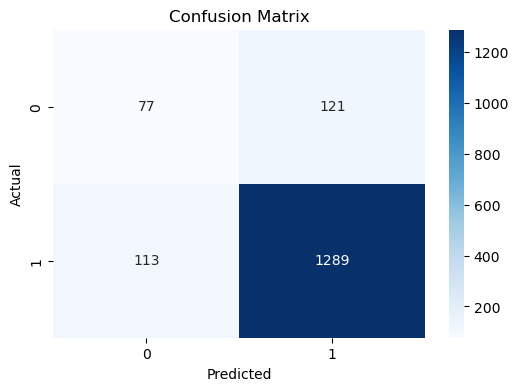

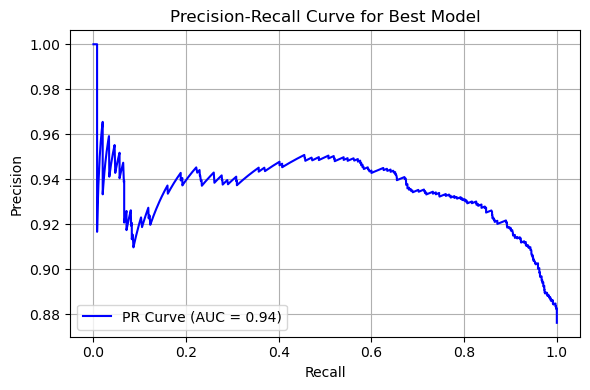


Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.405263 | 0.388889 |   0.396907 |  198       |
| 1            |    0.914184 | 0.919401 |   0.916785 | 1402       |
| accuracy     |    0.85375  | 0.85375  |   0.85375  |    0.85375 |
| macro avg    |    0.659724 | 0.654145 |   0.656846 | 1600       |
| weighted avg |    0.851205 | 0.85375  |   0.85245  | 1600       |


In [97]:
model_rf_score = evaluate_model(best_rf_model, X_train, X_test, y_train, y_test)

In [98]:
top_score['RandomForest-Tuned'] = model_rf_score
top_score

,XGBoost,CatBoost,RandomForest,LightGBM,CatBoost-Tuned,RandomForest-Tuned
Accuracy,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750
Precision,0.860430,0.860558,0.844308,0.856303,0.857689,0.851205
Recall,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750
F1-Score,0.852242,0.842234,0.838705,0.833646,0.851853,0.852450
Precision-Recall Curve,0.936221,0.938152,0.931371,0.933058,0.936785,0.935552


### 13: LightGBM - Cross Validation & Hyperparameter Tuning

In [99]:
param_distributions_lgbm = {
    'n_estimators': [50, 100, 200, 500],  # Number of boosting iterations
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'num_leaves': [20, 31, 40, 50],  # Number of leaves in a tree
    'max_depth': [-1, 10, 20, 30],  # Maximum tree depth, -1 means no limit
    'min_child_samples': [10, 20, 30, 50],  # Minimum number of data in one leaf
    'min_child_weight': [1e-3, 1e-2, 0.1, 1.0],  # Minimum sum of instance weight (hessian)
    'subsample': [0.6, 0.8, 1.0],  # Fraction of data used for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'reg_alpha': [0.0, 0.1, 1.0],  # L1 regularization
    'reg_lambda': [0.0, 0.1, 1.0],  # L2 regularization
}

In [100]:
lgbm_model = LGBMClassifier(random_state=42)
grid_search_lgbm = RandomizedSearchCV(estimator=lgbm_model, param_distributions=param_distributions_lgbm, n_iter=10, scoring='f1', cv=5, verbose=2,
 n_jobs=-1, random_state=42)

In [101]:
grid_search_lgbm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Info] Number of positive: 5610, number of negative: 5610
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 11220, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [-1, 10, 20, 30],
                                        'min_child_samples': [10, 20, 30, 50],
                                        'min_child_weight': [0.001, 0.01, 0.1,
                                                             1.0],
                                        'n_estimators': [50, 100, 200, 500],
                                        'num_leaves': [20, 31, 40, 50],
                                        'reg_alpha': [0.0, 0.1, 1.0],
                                        'reg_lambda': [0.0, 0.1, 1.0],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [102]:
best_lgbm_model = grid_search_lgbm.best_estimator_


Confusion Matrix:


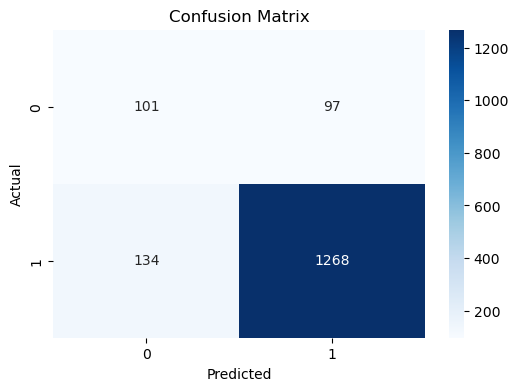

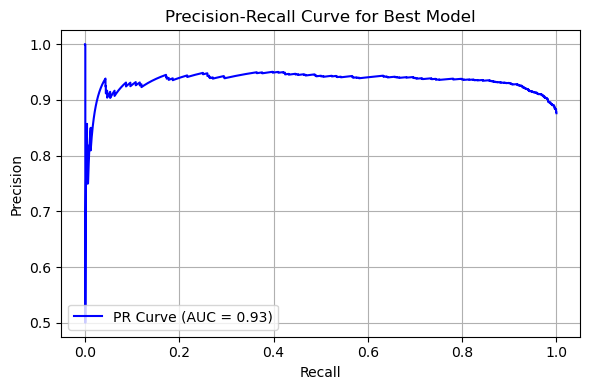


Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.429787 | 0.510101 |   0.466513 |  198        |
| 1            |    0.928938 | 0.904422 |   0.916516 | 1402        |
| accuracy     |    0.855625 | 0.855625 |   0.855625 |    0.855625 |
| macro avg    |    0.679362 | 0.707262 |   0.691514 | 1600        |
| weighted avg |    0.867168 | 0.855625 |   0.860828 | 1600        |


In [103]:
model_lgbm_score = evaluate_model(best_lgbm_model, X_train, X_test, y_train, y_test)

In [104]:
top_score['LightGBM-Tuned'] = model_lgbm_score
top_score

,XGBoost,CatBoost,RandomForest,LightGBM,CatBoost-Tuned,RandomForest-Tuned,LightGBM-Tuned
Accuracy,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750,0.855625
Precision,0.860430,0.860558,0.844308,0.856303,0.857689,0.851205,0.867168
Recall,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750,0.855625
F1-Score,0.852242,0.842234,0.838705,0.833646,0.851853,0.852450,0.860828
Precision-Recall Curve,0.936221,0.938152,0.931371,0.933058,0.936785,0.935552,0.933552


### 14: XGBoost - Cross Validation & Hyperparameter Tuning

In [105]:
param_grid_xgb = {
    'n_estimators': randint(100, 1000),       # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.3),     # Step size shrinkage
    'max_depth': randint(3, 15),             # Maximum depth of trees
    'min_child_weight': randint(1, 10),      # Minimum sum of instance weight (regularization)
    'subsample': uniform(0.5, 1.0),          # Fraction of training data for each tree
    'colsample_bytree': uniform(0.5, 1.0),   # Fraction of features for each tree
    'gamma': uniform(0, 1),                  # Regularization parameter
    'scale_pos_weight': [1, 2, 3],           # Balance for imbalanced datasets
}

In [106]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [107]:
grid_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=50, scoring='f1', cv=5, 
     verbose=1, random_state=42, n_jobs=-1)

In [108]:
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000011776F34D40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001177496E180>,
                                        'scale_pos_weight': [1, 2, 3],
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000011776F35940>},
                   random_state=42, scoring='f1', verbose=1)

In [109]:
best_model_xgb = grid_search_xgb.best_estimator_


Confusion Matrix:


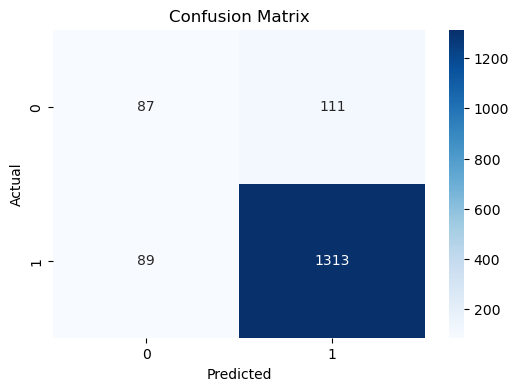

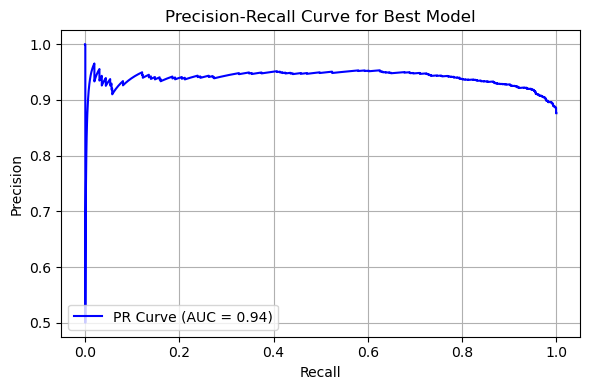


Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    0.494318 | 0.439394 |   0.465241 |   198     |
| 1            |    0.922051 | 0.936519 |   0.929229 |  1402     |
| accuracy     |    0.875    | 0.875    |   0.875    |     0.875 |
| macro avg    |    0.708184 | 0.687957 |   0.697235 |  1600     |
| weighted avg |    0.869119 | 0.875    |   0.87181  |  1600     |


In [110]:
model_xgb_score = evaluate_model(best_model_xgb, X_train, X_test, y_train, y_test)

In [111]:
top_score['XGBoost-Tuned'] = model_xgb_score
top_score

,XGBoost,CatBoost,RandomForest,LightGBM,CatBoost-Tuned,RandomForest-Tuned,LightGBM-Tuned,XGBoost-Tuned
Accuracy,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750,0.855625,0.875000
Precision,0.860430,0.860558,0.844308,0.856303,0.857689,0.851205,0.867168,0.869119
Recall,0.845625,0.829375,0.833750,0.818125,0.846875,0.853750,0.855625,0.875000
F1-Score,0.852242,0.842234,0.838705,0.833646,0.851853,0.852450,0.860828,0.871810
Precision-Recall Curve,0.936221,0.938152,0.931371,0.933058,0.936785,0.935552,0.933552,0.939403


# Selection of best model


#### In digital marketing conversion prediction project, selecting the appropriate evaluation metric is critical due to the cost implications of misclassifications. False Positives (predicting "Yes" when the user doesn’t convert) result in wasted marketing resources, while False Negatives (predicting "No" when the user actually converts) lead to missed revenue opportunities. Since both types of errors carry significant importance, I prioritize the F1-Score as the evaluation metric. The F1-Score balances Precision and Recall, making it especially suitable for imbalanced datasets where a single metric like Accuracy could be misleading.

In [112]:
# Extract the F1-Score row
f1_scores = top_score.loc["F1-Score"]

# Sort the F1-Scores in descending order and get the top model name
top_model = f1_scores.sort_values(ascending=False).head(1).index

# Filter the DataFrame for the top model
best_model = top_score[top_model]

# Display the top model data
print("Top model Based on F1-Score:")
best_model

Top model Based on F1-Score:


,XGBoost-Tuned
Accuracy,0.875000
Precision,0.869119
Recall,0.875000
F1-Score,0.871810
Precision-Recall Curve,0.939403


# Feature Importance

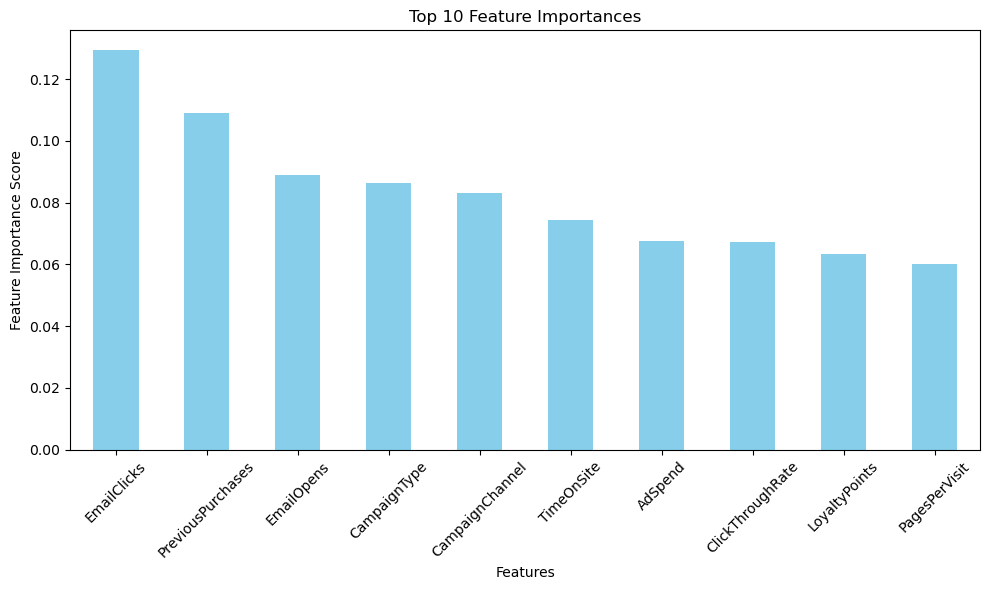

In [113]:
feature_names = ['CampaignChannel','CampaignType','AdSpend','ClickThroughRate','ConversionRate','WebsiteVisits','PagesPerVisit','TimeOnSite','SocialShares',
                'EmailOpens','EmailClicks','PreviousPurchases','LoyaltyPoints']

# Convert the NumPy array to a DataFrame
X_train = pd.DataFrame(X_train, columns=feature_names)

# Extract feature importance scores
feature_importances = best_model_xgb.feature_importances_

# Convert to a Pandas Series with feature names as the index
w = pd.Series(feature_importances, index=X_train.columns)

# Sort values in descending order and select the top 10 features
top_features = w.sort_values(ascending=False)[:10]

# Plot the top 10 feature importances as a bar chart
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.ylabel("Feature Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()